In [27]:
# IMPORTS
from dockembeddings import train_docModel, load_docModel, vec_docEmbeddings
from hierarchical_clustering import hierarchical_clustering

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


import time
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

data_dir = "."
doc2vec_model_file = 'my_doc2vec_n200.model'
train_file = 'verbalAutopsy_train.csv'
test_file = 'verbalAutopsy_test.csv'

Vectorización

In [22]:
# Lee los datos
train = pd.read_csv(train_file)

# Define los intervalos de edad
bins = [0, 20, 40, 60, float('inf')]  # Los límites de los intervalos

# Define las etiquetas para cada intervalo
labels = ['0-20', '21-40', '41-60', '60+']

# Crea una nueva columna en el DataFrame que representa los intervalos de edad
train['age_interval'] = pd.cut(train['age'], bins=bins, labels=labels, right=False)

# Muestra los primeros registros con la nueva columna
#print(train[['age', 'age_interval']].head())

train_0_20 = train[train['age_interval'] == '0-20']
train_21_40 = train[train['age_interval'] == '21-40']
train_41_60 = train[train['age_interval'] == '41-60']
train_60_plus = train[train['age_interval'] == '60+']

#print(train_0_20.head())
#print("-----------------------------------")
print(train_21_40.head())
print("-----------------------------------")
print(train_41_60.head())

x_train=train['open_response']
y_train=train['gs_text34']

x_train_0_20 = train_0_20['open_response']
y_train_0_20= train_0_20['gs_text34']

x_train_21_40 = train_21_40['open_response']
y_train_21_40= train_21_40['gs_text34']

x_train_41_60 = train_41_60['open_response']
y_train_41_60= train_41_60['gs_text34']

x_train_60_plus = train_60_plus['open_response']
y_train_60_plus= train_60_plus['gs_text34']

#print(x_train.head())
#print(y_train.head())

# Obtenemos la vectorizacion de los documentos -> [(index, vector)]
# Entrenamos el modelo
# train_docModel(pd.read_csv(train_file)['open_response'], model_file)
#docModel = load_docModel(doc2vec_model_file)
#x_train = list(vec_docEmbeddings(x_train, docModel))

    newid module   age  sex site  \
2    3667  Adult  23.0    2   AP   
15   7538  Adult  20.0    1   UP   
17   3218  Adult  25.0    2   UP   
26   1503  Adult  34.0    1   UP   
28   1235  Adult  24.0    2   UP   

                                        open_response  gs_text34 age_interval  
2   i took my wife to a private hospital for tubec...   Maternal        21-40  
15                     the deceased had been poisoned    Suicide        21-40  
17  the deceased was # months pregnant the child h...   Maternal        21-40  
26  the deceased had been working in place for the...       AIDS        21-40  
28  the deceased suffered an ulcer in the stomach ...  Cirrhosis        21-40  
-----------------------------------
    newid module   age  sex   site  \
3     452  Adult  40.0    1     AP   
4    2904  Adult  55.0    1     UP   
8    6334  Adult  54.0    2  Bohol   
10   2920  Adult  45.0    1     UP   
11   7718  Adult  55.0    2     UP   

                                      

In [21]:
# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, x_train, y_train):
    vectorizer = TfidfVectorizer()
    x_train_vec = vectorizer.fit_transform(x_train)
    print(x_train_vec)
    #vectorizer = CountVectorizer()
    #x_train_vec = vectorizer.fit_transform(x_train)
    # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
        x_train_vec, y_train, test_size=0.2, random_state=42
    )
    
    # Entrenar el modelo
    model.fit(x_train_split, y_train_split)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test_split)

    # Calcular el F-score
    f_score = f1_score(y_test_split, y_pred, average='weighted')
    # Imprimir la matriz de confusión
    cm = confusion_matrix(y_test_split, y_pred)
    print("Matriz de Confusión:")
    print(cm)

    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Verdaderos")
    plt.title("Matriz de Confusión")
    plt.show()
    return f_score

In [6]:
# Inicializar modelos
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=50000)
svm_model = SVC()

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

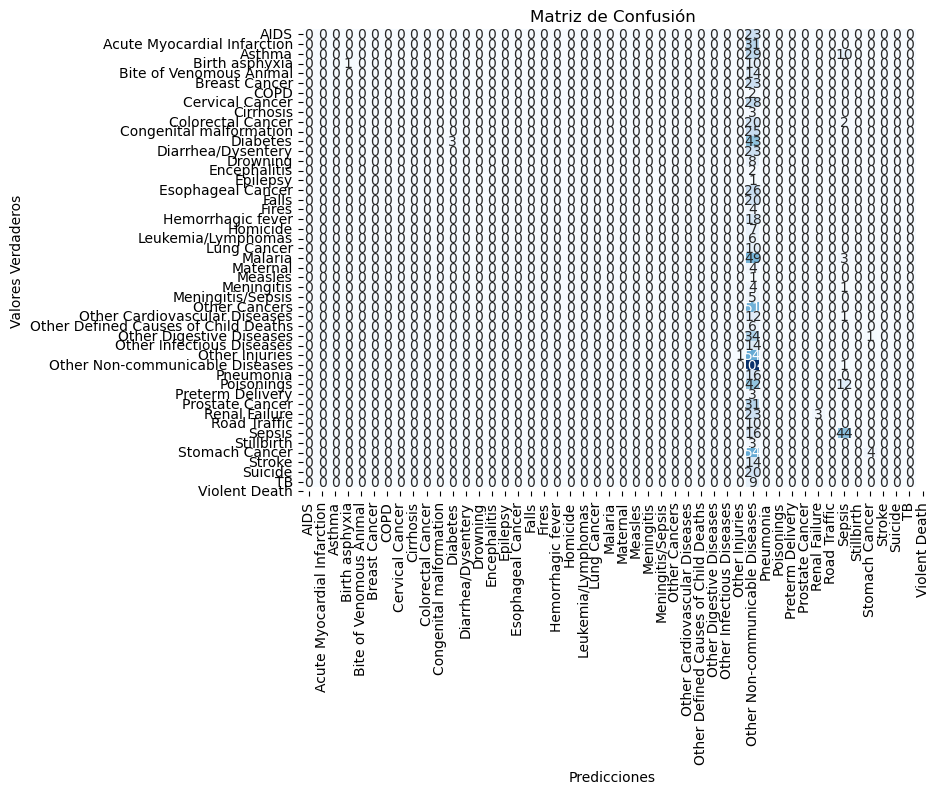

  (0, 3418)	0.38959631918348797
  (0, 2468)	0.25873121605474
  (0, 1204)	0.25096977228831097
  (0, 3140)	0.1623760539125377
  (0, 687)	0.8230787234534208
  (0, 4630)	0.12026001592028138
  (1, 4625)	0.030139036547484246
  (1, 854)	0.1582209868515166
  (1, 4927)	0.062175412339725185
  (1, 805)	0.06596956411861586
  (1, 3508)	0.07444120909818021
  (1, 2031)	0.10636160421749766
  (1, 3044)	0.08654344725883498
  (1, 822)	0.04952205639701103
  (1, 3496)	0.06108119918717731
  (1, 4665)	0.070783629376187
  (1, 344)	0.04460462487923726
  (1, 673)	0.038567129195383895
  (1, 2875)	0.1167874824356275
  (1, 511)	0.05709660683407062
  (1, 1992)	0.05919594711523205
  (1, 1263)	0.05648347218724462
  (1, 3079)	0.07219372461203873
  (1, 1576)	0.1582209868515166
  (1, 2121)	0.07286922332787428
  :	:
  (2065, 3817)	0.24785499687574572
  (2065, 2386)	0.2318358113337661
  (2065, 2172)	0.25384038940520315
  (2065, 4346)	0.28618013572078194
  (2065, 746)	0.18166852163944772
  (2065, 2036)	0.11882209628740469


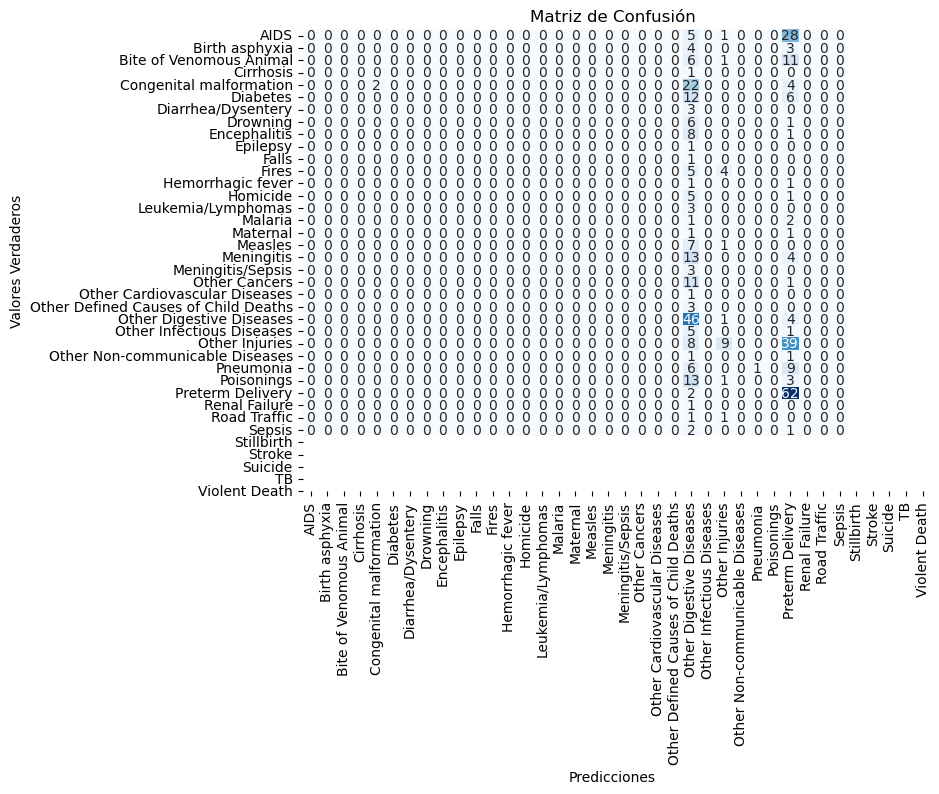

  (0, 2523)	0.14508980092315632
  (0, 1012)	0.11074946339001206
  (0, 1112)	0.04464747519084256
  (0, 515)	0.07587807762468707
  (0, 2122)	0.15534204148361525
  (0, 1249)	0.18312060304383013
  (0, 1709)	0.03949666389827567
  (0, 3422)	0.18312060304383013
  (0, 1309)	0.17286836248337117
  (0, 1479)	0.1655942820440742
  (0, 2626)	0.0837873069947531
  (0, 4310)	0.18312060304383013
  (0, 1639)	0.07718461145891684
  (0, 1966)	0.11381808921193924
  (0, 4226)	0.059947266591836766
  (0, 3757)	0.09932095788929592
  (0, 1660)	0.07938470599370105
  (0, 479)	0.07312323208259158
  (0, 4237)	0.10439494379380866
  (0, 148)	0.06123912621267146
  (0, 4215)	0.06370008666446102
  (0, 2089)	0.1146471843542676
  (0, 105)	0.10549189837034893
  (0, 3692)	0.07856235265554311
  (0, 1937)	0.2497988498294531
  :	:
  (1025, 2151)	0.12974602685671605
  (1025, 2644)	0.16123103181961362
  (1025, 3855)	0.08862318920725716
  (1025, 3635)	0.14055026312374752
  (1025, 1008)	0.1051571678580147
  (1025, 2147)	0.1263740398

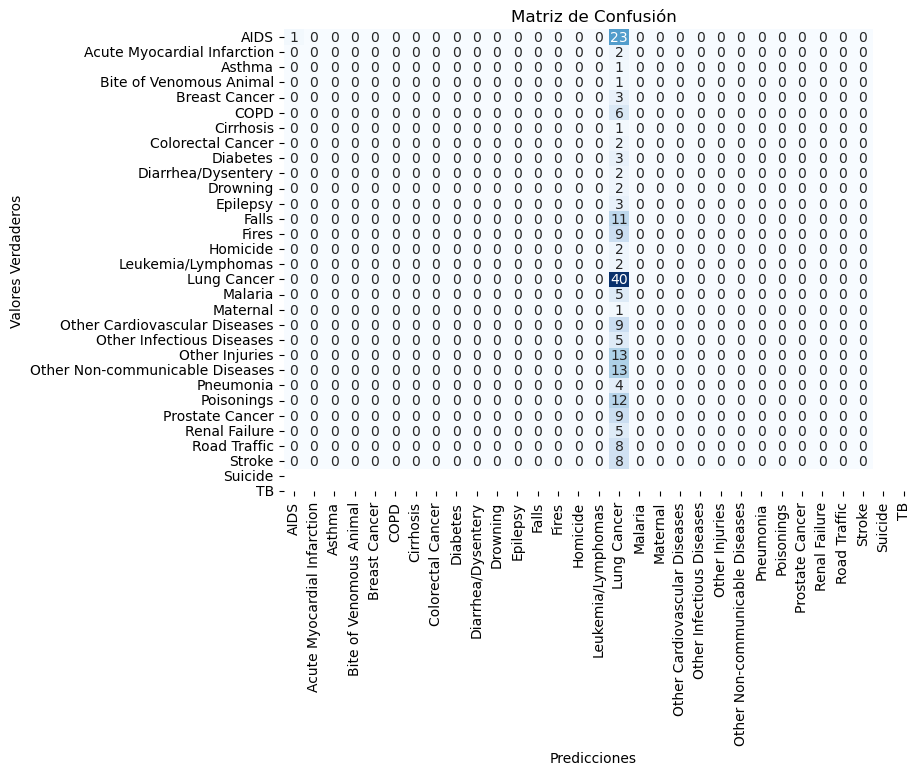

  (0, 11)	0.08923315593498032
  (0, 4245)	0.07593195208507972
  (0, 2042)	0.12379342740768444
  (0, 4457)	0.17473932774699527
  (0, 774)	0.15701574184315914
  (0, 1026)	0.11606035838384836
  (0, 100)	0.05371088941991072
  (0, 1945)	0.10725934571951395
  (0, 1905)	0.19475638291519565
  (0, 4433)	0.05690128114231946
  (0, 2662)	0.15701574184315914
  (0, 4356)	0.031369169068178174
  (0, 1932)	0.03867301314148931
  (0, 1899)	0.11500589919173754
  (0, 4069)	0.06574375638758514
  (0, 4366)	0.05356135841195012
  (0, 1662)	0.10228928414019572
  (0, 3539)	0.14395406882678274
  (0, 1745)	0.07004804485116585
  (0, 4429)	0.18510696087904951
  (0, 1325)	0.3347667499504267
  (0, 4079)	0.18510696087904951
  (0, 1914)	0.15701574184315914
  (0, 4223)	0.07166042433000391
  (0, 4399)	0.05681647267488678
  :	:
  (1023, 524)	0.09845604548025617
  (1023, 2878)	0.10726293290528723
  (1023, 1498)	0.17533382803063394
  (1023, 1893)	0.12020911179112569
  (1023, 305)	0.1491100012359479
  (1023, 2824)	0.098075853

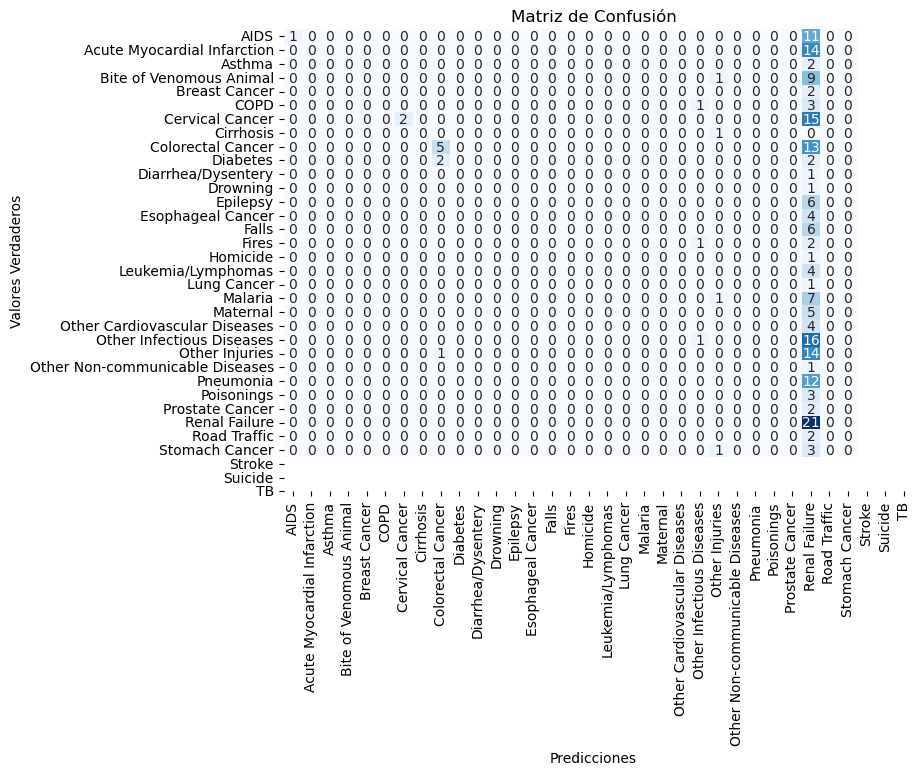

  (0, 1122)	0.08530431678078976
  (0, 1693)	0.221900899148548
  (0, 1248)	0.060682778403722645
  (0, 1453)	0.16331327215689898
  (0, 4195)	0.11817454227944936
  (0, 520)	0.07645244466231504
  (0, 2065)	0.06340213830701417
  (0, 4775)	0.11035214024886546
  (0, 4107)	0.11035214024886546
  (0, 4076)	0.09818566607989167
  (0, 2235)	0.1773996414953513
  (0, 3034)	0.10979626820651167
  (0, 3216)	0.1322609116179017
  (0, 1973)	0.09027582060653672
  (0, 4338)	0.05216108347976706
  (0, 3680)	0.07440221790188233
  (0, 569)	0.08344747158929298
  (0, 1260)	0.09607949024174167
  (0, 2951)	0.052004001396909166
  (0, 901)	0.13173847678840025
  (0, 4185)	0.11149130005717095
  (0, 618)	0.06048215458455875
  (0, 2888)	0.13988185299910752
  (0, 156)	0.11852724847103903
  (0, 272)	0.10588864117447121
  :	:
  (1091, 2154)	0.1453512090904493
  (1091, 2861)	0.1453512090904493
  (1091, 2893)	0.1444120439506743
  (1091, 1388)	0.0910267574748533
  (1091, 4278)	0.12614929424944504
  (1091, 1123)	0.16053584057113

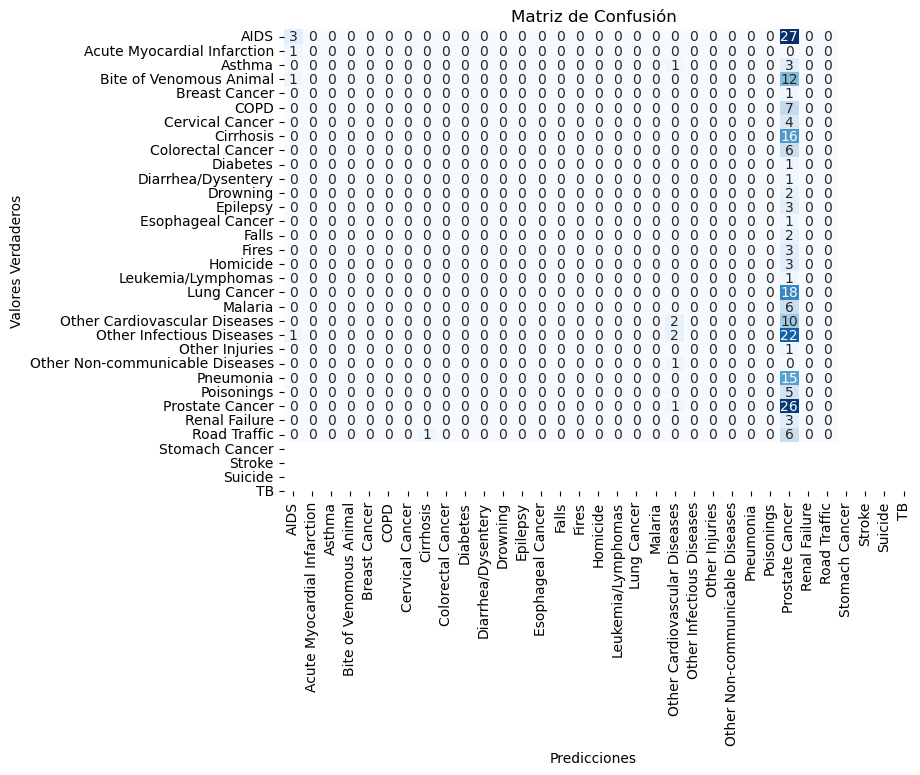

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

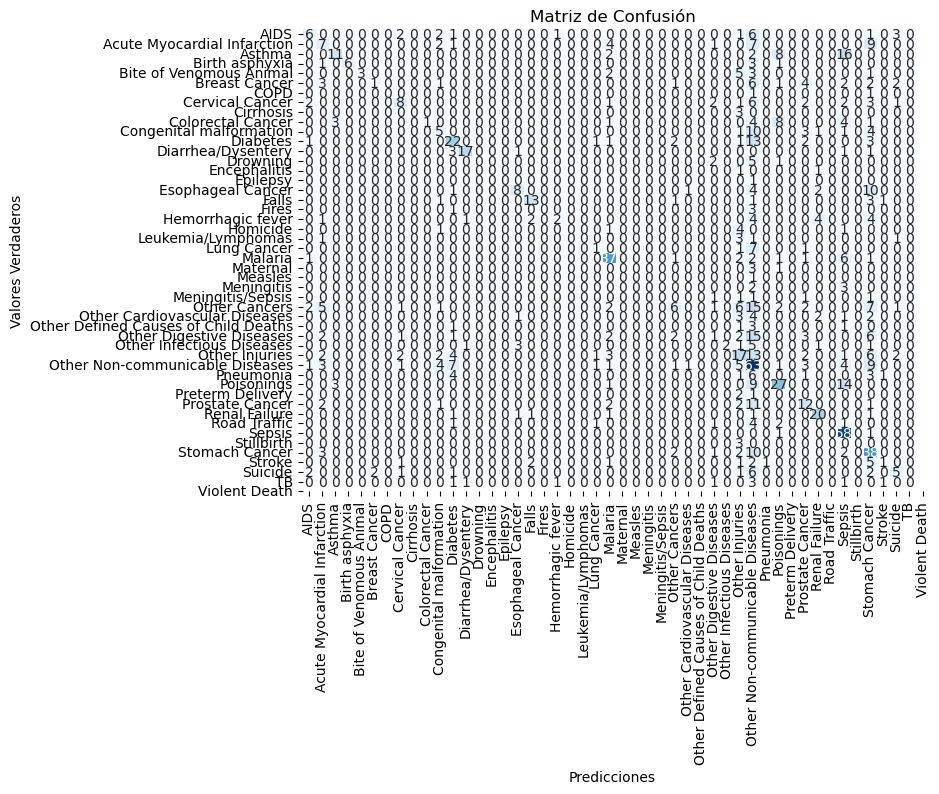

  (0, 3418)	0.38959631918348797
  (0, 2468)	0.25873121605474
  (0, 1204)	0.25096977228831097
  (0, 3140)	0.1623760539125377
  (0, 687)	0.8230787234534208
  (0, 4630)	0.12026001592028138
  (1, 4625)	0.030139036547484246
  (1, 854)	0.1582209868515166
  (1, 4927)	0.062175412339725185
  (1, 805)	0.06596956411861586
  (1, 3508)	0.07444120909818021
  (1, 2031)	0.10636160421749766
  (1, 3044)	0.08654344725883498
  (1, 822)	0.04952205639701103
  (1, 3496)	0.06108119918717731
  (1, 4665)	0.070783629376187
  (1, 344)	0.04460462487923726
  (1, 673)	0.038567129195383895
  (1, 2875)	0.1167874824356275
  (1, 511)	0.05709660683407062
  (1, 1992)	0.05919594711523205
  (1, 1263)	0.05648347218724462
  (1, 3079)	0.07219372461203873
  (1, 1576)	0.1582209868515166
  (1, 2121)	0.07286922332787428
  :	:
  (2065, 3817)	0.24785499687574572
  (2065, 2386)	0.2318358113337661
  (2065, 2172)	0.25384038940520315
  (2065, 4346)	0.28618013572078194
  (2065, 746)	0.18166852163944772
  (2065, 2036)	0.11882209628740469


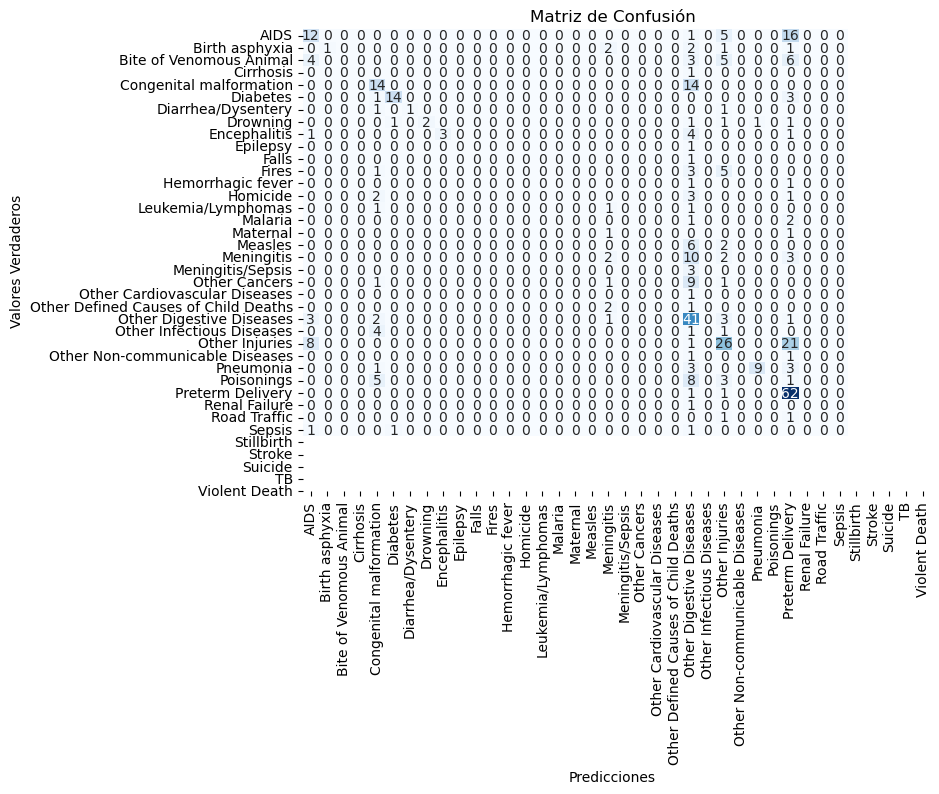

  (0, 2523)	0.14508980092315632
  (0, 1012)	0.11074946339001206
  (0, 1112)	0.04464747519084256
  (0, 515)	0.07587807762468707
  (0, 2122)	0.15534204148361525
  (0, 1249)	0.18312060304383013
  (0, 1709)	0.03949666389827567
  (0, 3422)	0.18312060304383013
  (0, 1309)	0.17286836248337117
  (0, 1479)	0.1655942820440742
  (0, 2626)	0.0837873069947531
  (0, 4310)	0.18312060304383013
  (0, 1639)	0.07718461145891684
  (0, 1966)	0.11381808921193924
  (0, 4226)	0.059947266591836766
  (0, 3757)	0.09932095788929592
  (0, 1660)	0.07938470599370105
  (0, 479)	0.07312323208259158
  (0, 4237)	0.10439494379380866
  (0, 148)	0.06123912621267146
  (0, 4215)	0.06370008666446102
  (0, 2089)	0.1146471843542676
  (0, 105)	0.10549189837034893
  (0, 3692)	0.07856235265554311
  (0, 1937)	0.2497988498294531
  :	:
  (1025, 2151)	0.12974602685671605
  (1025, 2644)	0.16123103181961362
  (1025, 3855)	0.08862318920725716
  (1025, 3635)	0.14055026312374752
  (1025, 1008)	0.1051571678580147
  (1025, 2147)	0.1263740398

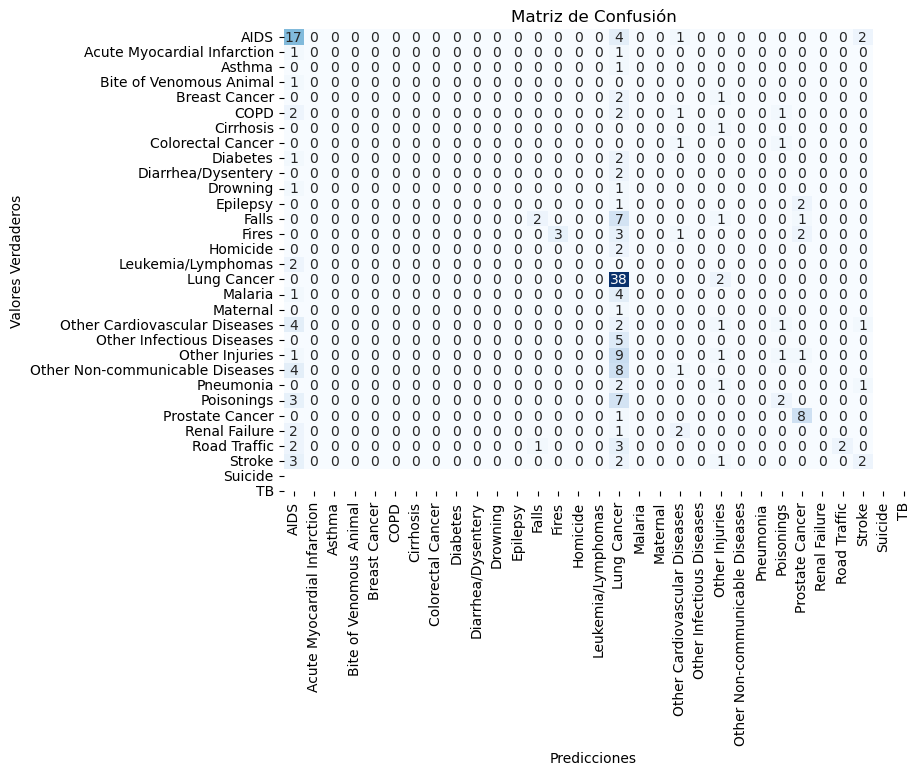

  (0, 11)	0.08923315593498032
  (0, 4245)	0.07593195208507972
  (0, 2042)	0.12379342740768444
  (0, 4457)	0.17473932774699527
  (0, 774)	0.15701574184315914
  (0, 1026)	0.11606035838384836
  (0, 100)	0.05371088941991072
  (0, 1945)	0.10725934571951395
  (0, 1905)	0.19475638291519565
  (0, 4433)	0.05690128114231946
  (0, 2662)	0.15701574184315914
  (0, 4356)	0.031369169068178174
  (0, 1932)	0.03867301314148931
  (0, 1899)	0.11500589919173754
  (0, 4069)	0.06574375638758514
  (0, 4366)	0.05356135841195012
  (0, 1662)	0.10228928414019572
  (0, 3539)	0.14395406882678274
  (0, 1745)	0.07004804485116585
  (0, 4429)	0.18510696087904951
  (0, 1325)	0.3347667499504267
  (0, 4079)	0.18510696087904951
  (0, 1914)	0.15701574184315914
  (0, 4223)	0.07166042433000391
  (0, 4399)	0.05681647267488678
  :	:
  (1023, 524)	0.09845604548025617
  (1023, 2878)	0.10726293290528723
  (1023, 1498)	0.17533382803063394
  (1023, 1893)	0.12020911179112569
  (1023, 305)	0.1491100012359479
  (1023, 2824)	0.098075853

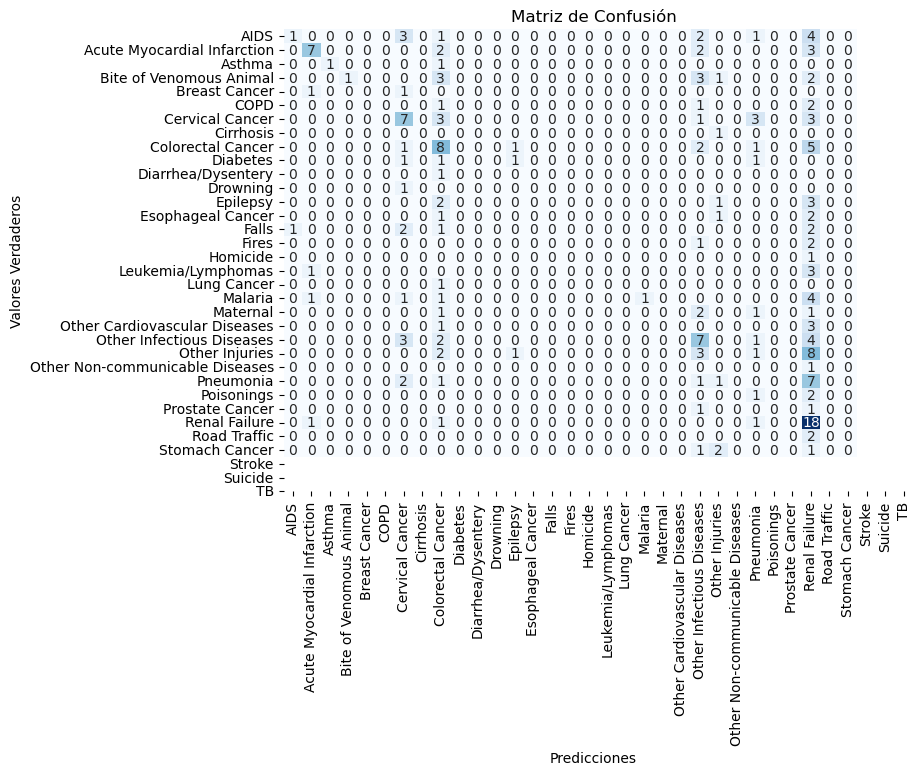

  (0, 1122)	0.08530431678078976
  (0, 1693)	0.221900899148548
  (0, 1248)	0.060682778403722645
  (0, 1453)	0.16331327215689898
  (0, 4195)	0.11817454227944936
  (0, 520)	0.07645244466231504
  (0, 2065)	0.06340213830701417
  (0, 4775)	0.11035214024886546
  (0, 4107)	0.11035214024886546
  (0, 4076)	0.09818566607989167
  (0, 2235)	0.1773996414953513
  (0, 3034)	0.10979626820651167
  (0, 3216)	0.1322609116179017
  (0, 1973)	0.09027582060653672
  (0, 4338)	0.05216108347976706
  (0, 3680)	0.07440221790188233
  (0, 569)	0.08344747158929298
  (0, 1260)	0.09607949024174167
  (0, 2951)	0.052004001396909166
  (0, 901)	0.13173847678840025
  (0, 4185)	0.11149130005717095
  (0, 618)	0.06048215458455875
  (0, 2888)	0.13988185299910752
  (0, 156)	0.11852724847103903
  (0, 272)	0.10588864117447121
  :	:
  (1091, 2154)	0.1453512090904493
  (1091, 2861)	0.1453512090904493
  (1091, 2893)	0.1444120439506743
  (1091, 1388)	0.0910267574748533
  (1091, 4278)	0.12614929424944504
  (1091, 1123)	0.16053584057113

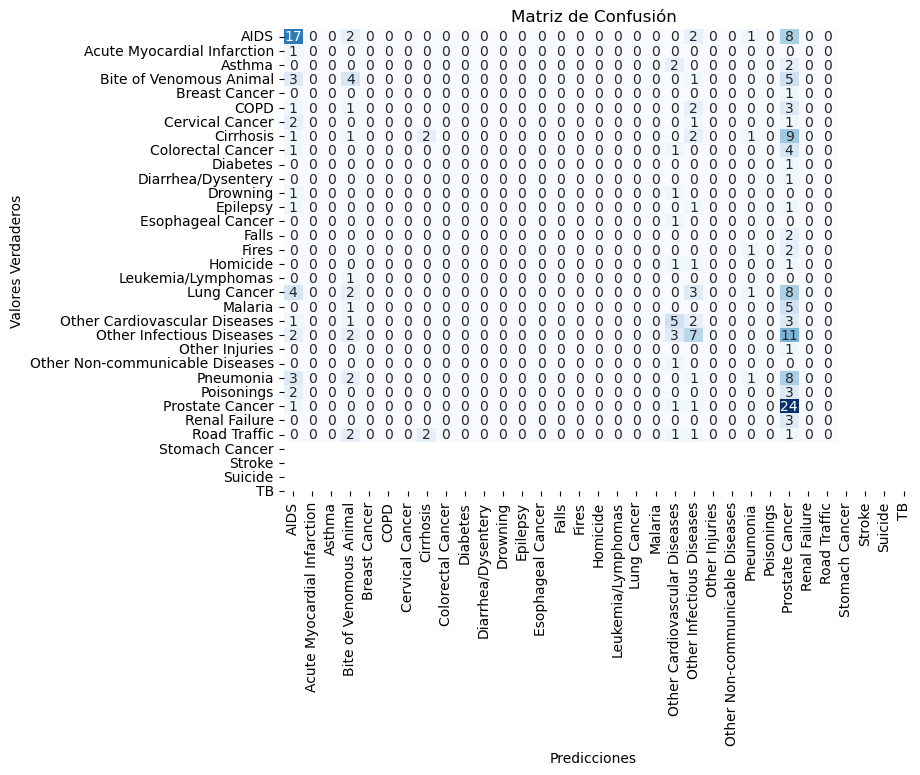

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

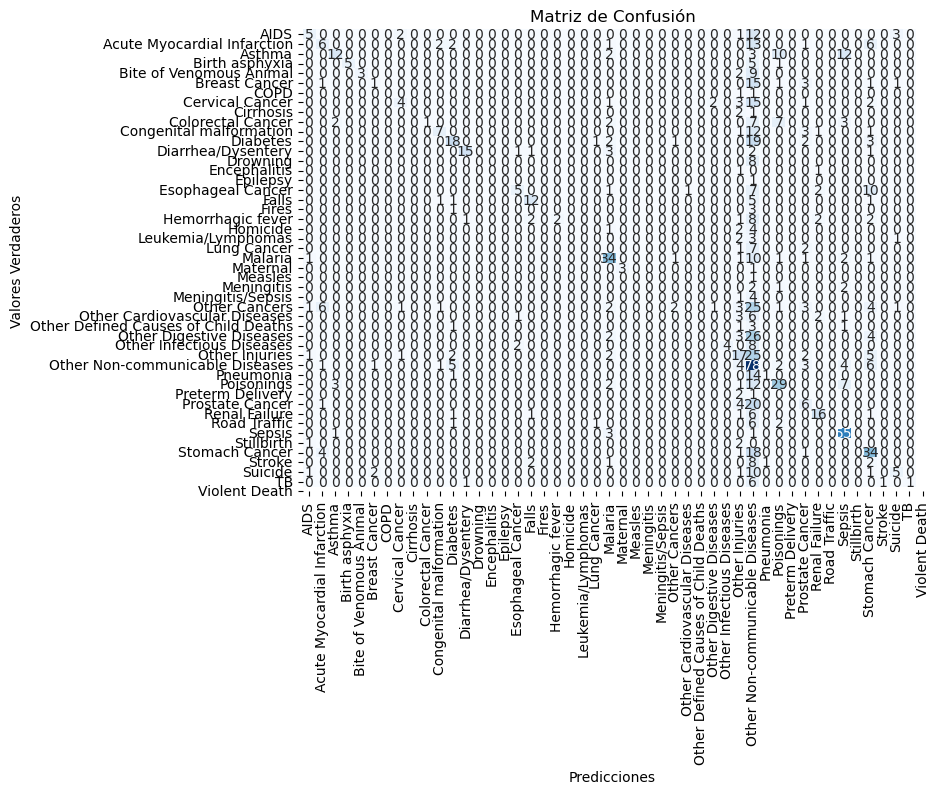

  (0, 3418)	0.38959631918348797
  (0, 2468)	0.25873121605474
  (0, 1204)	0.25096977228831097
  (0, 3140)	0.1623760539125377
  (0, 687)	0.8230787234534208
  (0, 4630)	0.12026001592028138
  (1, 4625)	0.030139036547484246
  (1, 854)	0.1582209868515166
  (1, 4927)	0.062175412339725185
  (1, 805)	0.06596956411861586
  (1, 3508)	0.07444120909818021
  (1, 2031)	0.10636160421749766
  (1, 3044)	0.08654344725883498
  (1, 822)	0.04952205639701103
  (1, 3496)	0.06108119918717731
  (1, 4665)	0.070783629376187
  (1, 344)	0.04460462487923726
  (1, 673)	0.038567129195383895
  (1, 2875)	0.1167874824356275
  (1, 511)	0.05709660683407062
  (1, 1992)	0.05919594711523205
  (1, 1263)	0.05648347218724462
  (1, 3079)	0.07219372461203873
  (1, 1576)	0.1582209868515166
  (1, 2121)	0.07286922332787428
  :	:
  (2065, 3817)	0.24785499687574572
  (2065, 2386)	0.2318358113337661
  (2065, 2172)	0.25384038940520315
  (2065, 4346)	0.28618013572078194
  (2065, 746)	0.18166852163944772
  (2065, 2036)	0.11882209628740469


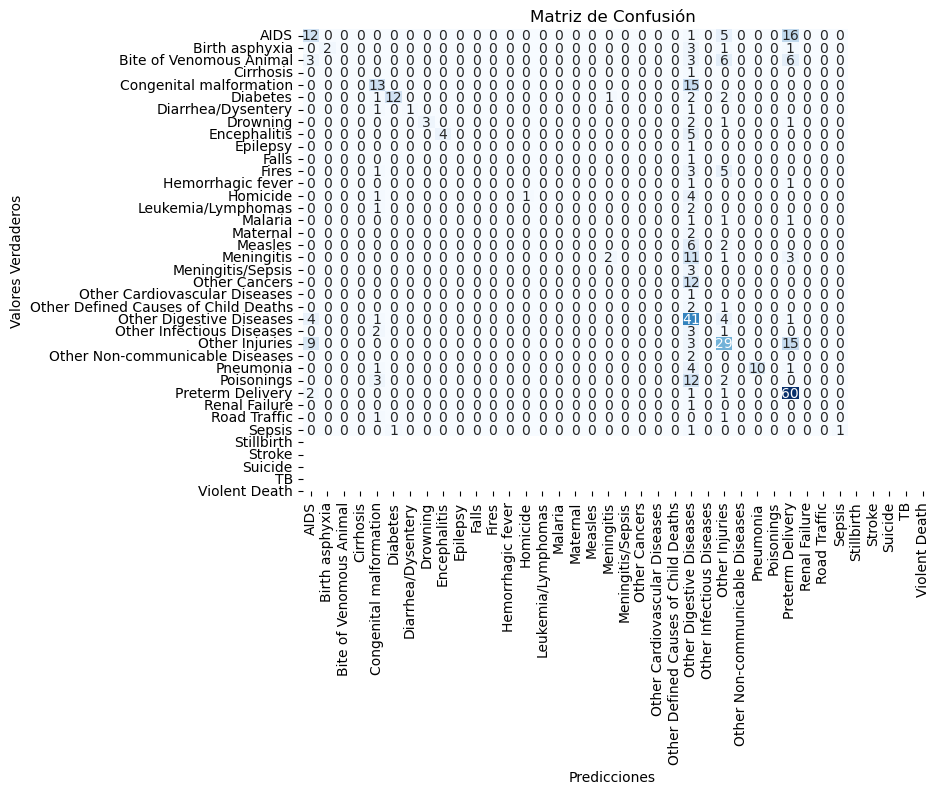

  (0, 2523)	0.14508980092315632
  (0, 1012)	0.11074946339001206
  (0, 1112)	0.04464747519084256
  (0, 515)	0.07587807762468707
  (0, 2122)	0.15534204148361525
  (0, 1249)	0.18312060304383013
  (0, 1709)	0.03949666389827567
  (0, 3422)	0.18312060304383013
  (0, 1309)	0.17286836248337117
  (0, 1479)	0.1655942820440742
  (0, 2626)	0.0837873069947531
  (0, 4310)	0.18312060304383013
  (0, 1639)	0.07718461145891684
  (0, 1966)	0.11381808921193924
  (0, 4226)	0.059947266591836766
  (0, 3757)	0.09932095788929592
  (0, 1660)	0.07938470599370105
  (0, 479)	0.07312323208259158
  (0, 4237)	0.10439494379380866
  (0, 148)	0.06123912621267146
  (0, 4215)	0.06370008666446102
  (0, 2089)	0.1146471843542676
  (0, 105)	0.10549189837034893
  (0, 3692)	0.07856235265554311
  (0, 1937)	0.2497988498294531
  :	:
  (1025, 2151)	0.12974602685671605
  (1025, 2644)	0.16123103181961362
  (1025, 3855)	0.08862318920725716
  (1025, 3635)	0.14055026312374752
  (1025, 1008)	0.1051571678580147
  (1025, 2147)	0.1263740398

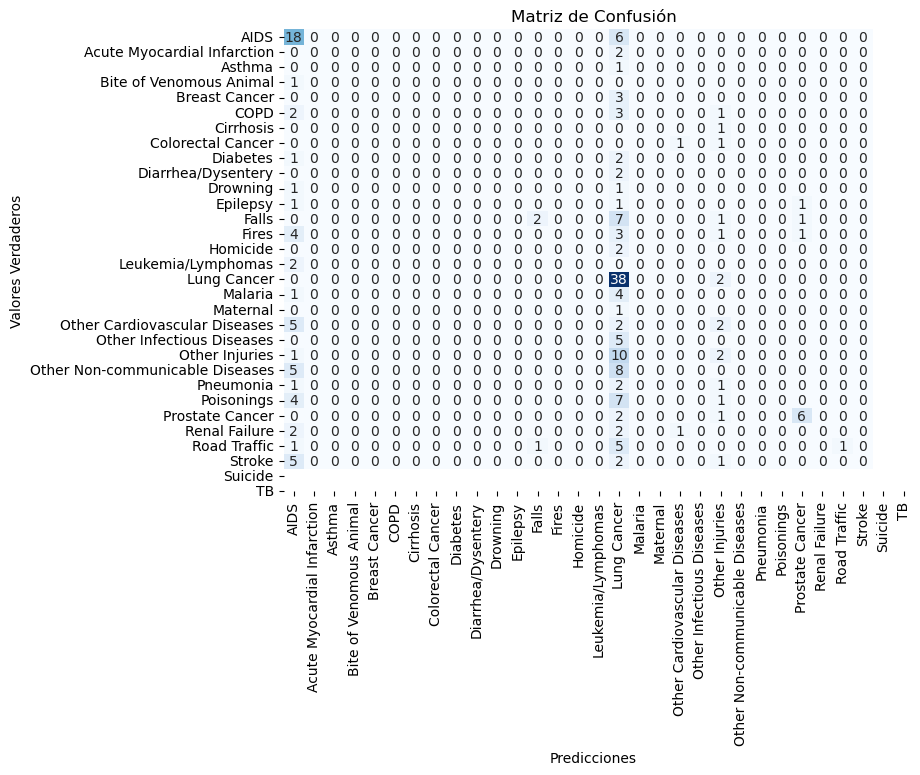

  (0, 11)	0.08923315593498032
  (0, 4245)	0.07593195208507972
  (0, 2042)	0.12379342740768444
  (0, 4457)	0.17473932774699527
  (0, 774)	0.15701574184315914
  (0, 1026)	0.11606035838384836
  (0, 100)	0.05371088941991072
  (0, 1945)	0.10725934571951395
  (0, 1905)	0.19475638291519565
  (0, 4433)	0.05690128114231946
  (0, 2662)	0.15701574184315914
  (0, 4356)	0.031369169068178174
  (0, 1932)	0.03867301314148931
  (0, 1899)	0.11500589919173754
  (0, 4069)	0.06574375638758514
  (0, 4366)	0.05356135841195012
  (0, 1662)	0.10228928414019572
  (0, 3539)	0.14395406882678274
  (0, 1745)	0.07004804485116585
  (0, 4429)	0.18510696087904951
  (0, 1325)	0.3347667499504267
  (0, 4079)	0.18510696087904951
  (0, 1914)	0.15701574184315914
  (0, 4223)	0.07166042433000391
  (0, 4399)	0.05681647267488678
  :	:
  (1023, 524)	0.09845604548025617
  (1023, 2878)	0.10726293290528723
  (1023, 1498)	0.17533382803063394
  (1023, 1893)	0.12020911179112569
  (1023, 305)	0.1491100012359479
  (1023, 2824)	0.098075853

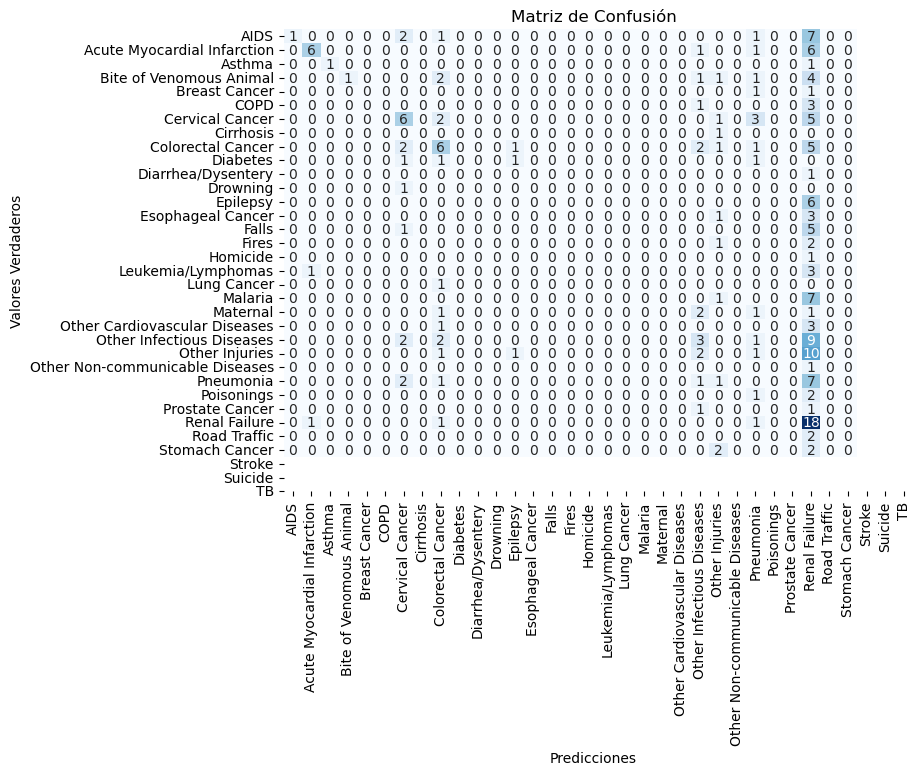

  (0, 1122)	0.08530431678078976
  (0, 1693)	0.221900899148548
  (0, 1248)	0.060682778403722645
  (0, 1453)	0.16331327215689898
  (0, 4195)	0.11817454227944936
  (0, 520)	0.07645244466231504
  (0, 2065)	0.06340213830701417
  (0, 4775)	0.11035214024886546
  (0, 4107)	0.11035214024886546
  (0, 4076)	0.09818566607989167
  (0, 2235)	0.1773996414953513
  (0, 3034)	0.10979626820651167
  (0, 3216)	0.1322609116179017
  (0, 1973)	0.09027582060653672
  (0, 4338)	0.05216108347976706
  (0, 3680)	0.07440221790188233
  (0, 569)	0.08344747158929298
  (0, 1260)	0.09607949024174167
  (0, 2951)	0.052004001396909166
  (0, 901)	0.13173847678840025
  (0, 4185)	0.11149130005717095
  (0, 618)	0.06048215458455875
  (0, 2888)	0.13988185299910752
  (0, 156)	0.11852724847103903
  (0, 272)	0.10588864117447121
  :	:
  (1091, 2154)	0.1453512090904493
  (1091, 2861)	0.1453512090904493
  (1091, 2893)	0.1444120439506743
  (1091, 1388)	0.0910267574748533
  (1091, 4278)	0.12614929424944504
  (1091, 1123)	0.16053584057113

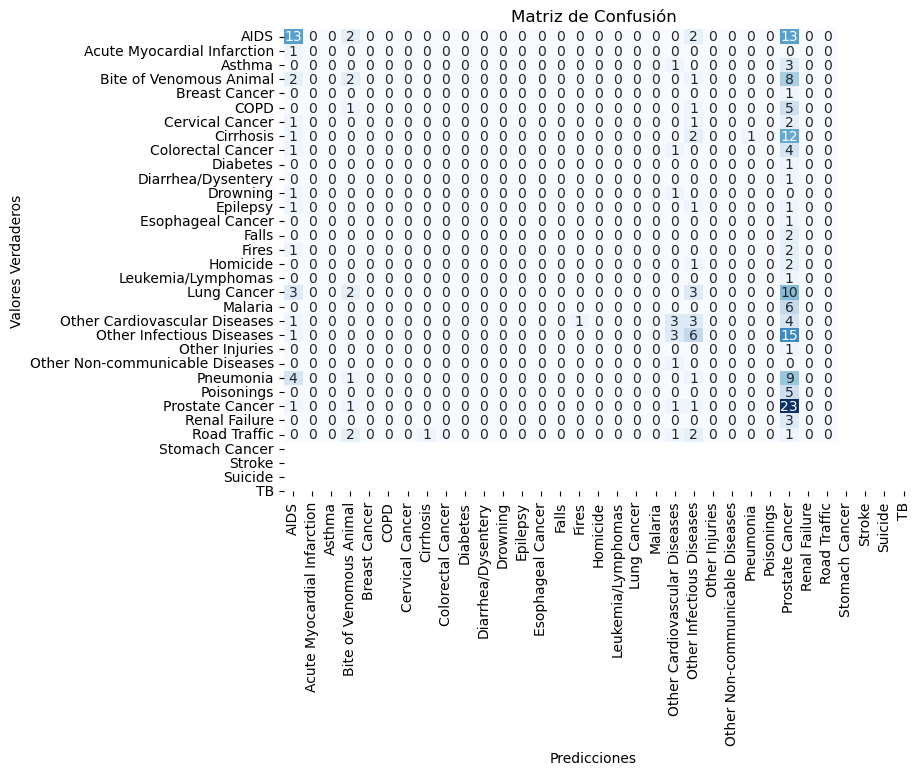

In [28]:
models=["nb","lr","svm"]
f_scores = []
# Iterar sobre los modelos
for model_type in models:
    # Obtener el modelo correspondiente
    if model_type == "nb":
        model = MultinomialNB()
    elif model_type == "lr":
        model = LogisticRegression(max_iter=500)
    elif model_type == "svm":
        model = SVC()

# Almacenar F-scores para cada intervalo de edad
    
    f_scores_interval = []
  # Entrenar y evaluar el modelo con el conjunto de datos específico
    f_score = train_and_evaluate_model(model, x_train, y_train)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_0_20, y_train_0_20)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_21_40, y_train_21_40)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_41_60, y_train_41_60)
    f_scores_interval.append(f_score)
    f_score = train_and_evaluate_model(model, x_train_60_plus, y_train_60_plus)
    f_scores_interval.append(f_score)
    f_scores.append((model_type, f_scores_interval))

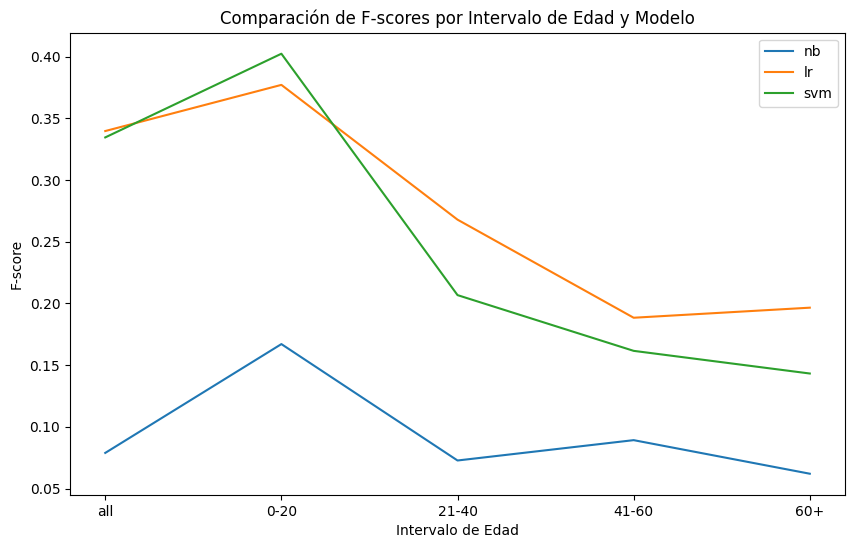

In [71]:
plt.figure(figsize=(10, 6))

intervalos_edad = ['all','0-20', '21-40', '41-60', '60+']

for model_type, f_scores_interval in f_scores:
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Graficar los resultados para cada intervalo de edad
    plt.plot(intervalos_edad, f_scores_interval, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.legend()
plt.show()

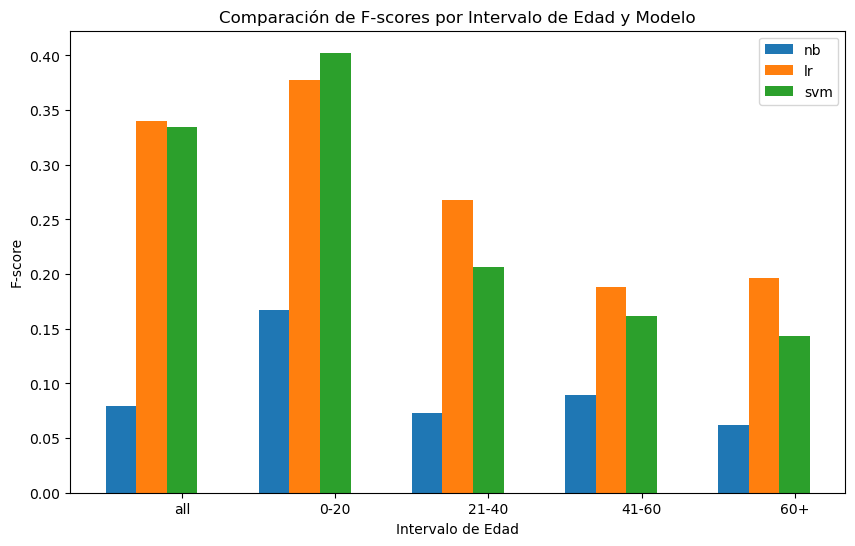

In [16]:
plt.figure(figsize=(10, 6))
intervalos_edad = ['all', '0-20', '21-40', '41-60', '60+']

for i, (model_type, f_scores_interval) in enumerate(f_scores):
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Calcular la posición de las barras para cada modelo
    bar_positions = [x + i * 0.2 for x in range(len(intervalos_edad))]

    # Graficar las barras para cada modelo
    plt.bar(bar_positions, f_scores_interval, width=0.2, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.xticks([x + 0.4 for x in range(len(intervalos_edad))], intervalos_edad)  # Ajustar las posiciones de las etiquetas
plt.legend()
plt.show()

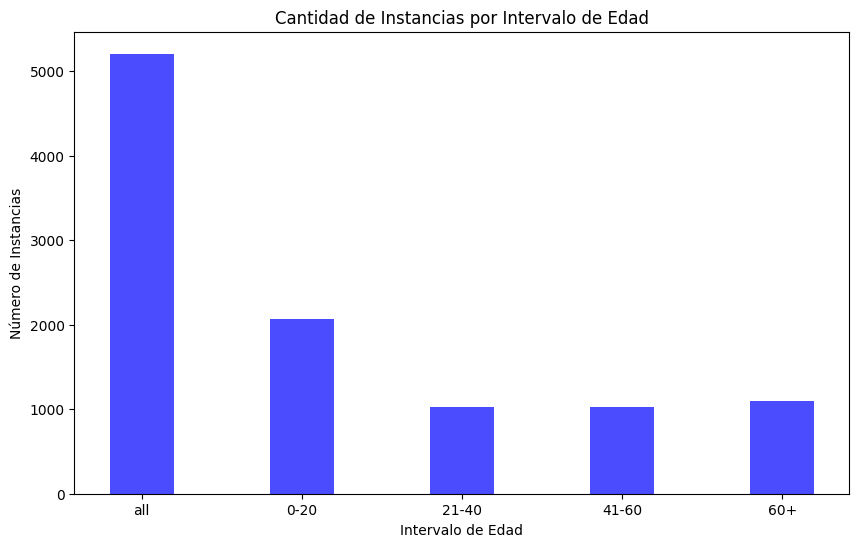

In [57]:
# Algo así: instancias_por_intervalo = [num1, num2, num3, num4, num5]

intervalos_edad = ['all','0-20', '21-40', '41-60', '60+']
bar_width = 0.4  # Ancho de las barras

plt.figure(figsize=(10, 6))

# Posiciones para los diferentes intervalos de edad
posiciones_edad = np.arange(len(intervalos_edad))
instancias_por_intervalo = [len(x_train),len(x_train_0_20), len(x_train_21_40), len(x_train_41_60), len(x_train_60_plus)]

# Graficar las barras
plt.bar(posiciones_edad, instancias_por_intervalo, width=bar_width, color='blue', alpha=0.7)

# Configuración del eje x
plt.xticks(posiciones_edad, intervalos_edad)

plt.xlabel('Intervalo de Edad')
plt.ylabel('Número de Instancias')
plt.title('Cantidad de Instancias por Intervalo de Edad')
plt.show()

Probar con diferentes intervalos y analisis de causa

In [29]:
# Separar los datos en las clases "child", "neonate" y "adult" dentro del módulo actual
train_child = train[train['module'] == 'Child']
train_neonate = train[train['module'] == 'Neonate']
train_adult = train[train['module'] == 'Adult']

x_train=train['open_response']
y_train=train['gs_text34']

x_train_child = train_child['open_response']
y_train_child= train_child['gs_text34']

x_train_neonate = train_neonate['open_response']
y_train_neonate= train_neonate['gs_text34']

x_train_adult = train_adult['open_response']
y_train_adult= train_adult['gs_text34']



  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

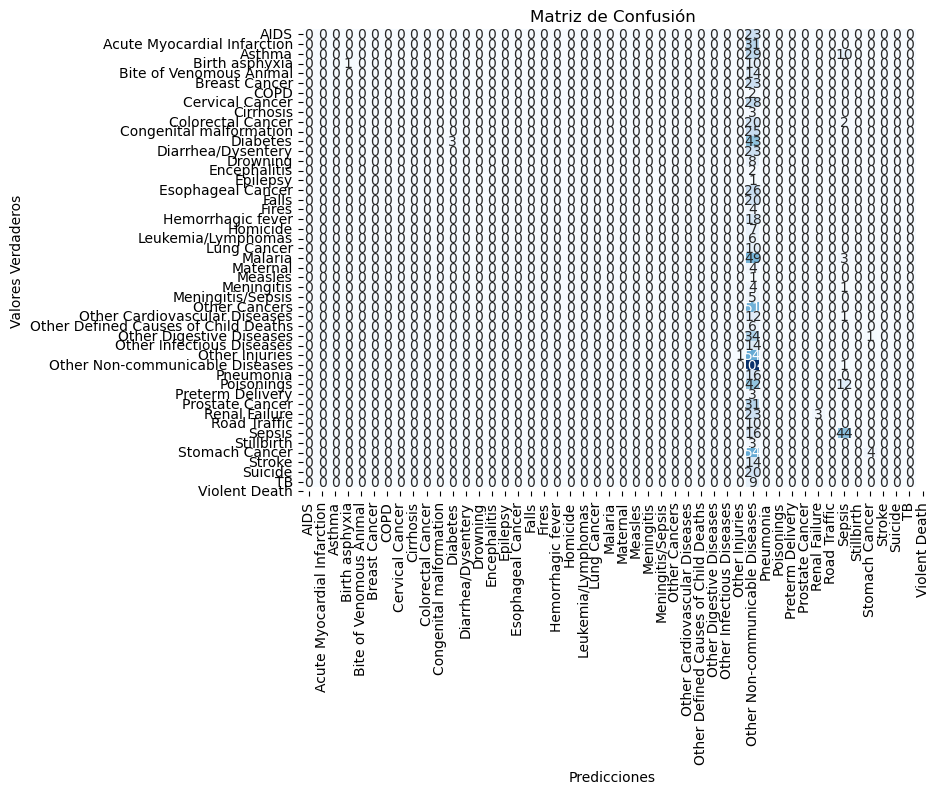

  (0, 2852)	0.030212858916784904
  (0, 514)	0.15113381567728956
  (0, 3042)	0.05709488481597293
  (0, 487)	0.058299336526212456
  (0, 2166)	0.06238368280255346
  (0, 1227)	0.11118975170975008
  (0, 1873)	0.08616402319401732
  (0, 497)	0.0597225235285204
  (0, 2154)	0.04870414403934839
  (0, 2878)	0.07087019601173815
  (0, 225)	0.04330212545652283
  (0, 410)	0.038939410712474025
  (0, 1772)	0.1190369603095867
  (0, 328)	0.04987745707495668
  (0, 1195)	0.05943019161328055
  (0, 741)	0.04378479311687836
  (0, 1896)	0.06542461933228107
  (0, 938)	0.15113381567728956
  (0, 1291)	0.0726819413207587
  (0, 2685)	0.06581262813230254
  (0, 2576)	0.0703796020815236
  (0, 1564)	0.12971104342096507
  (0, 1396)	0.07466189387221865
  (0, 469)	0.15113381567728956
  (0, 278)	0.05775561549326568
  :	:
  (874, 777)	0.11815404265769554
  (874, 2866)	0.15388512290266276
  (874, 3165)	0.18509303232833813
  (874, 2155)	0.06901014518191204
  (874, 1804)	0.05780944785291215
  (874, 2852)	0.07236819961677717
  

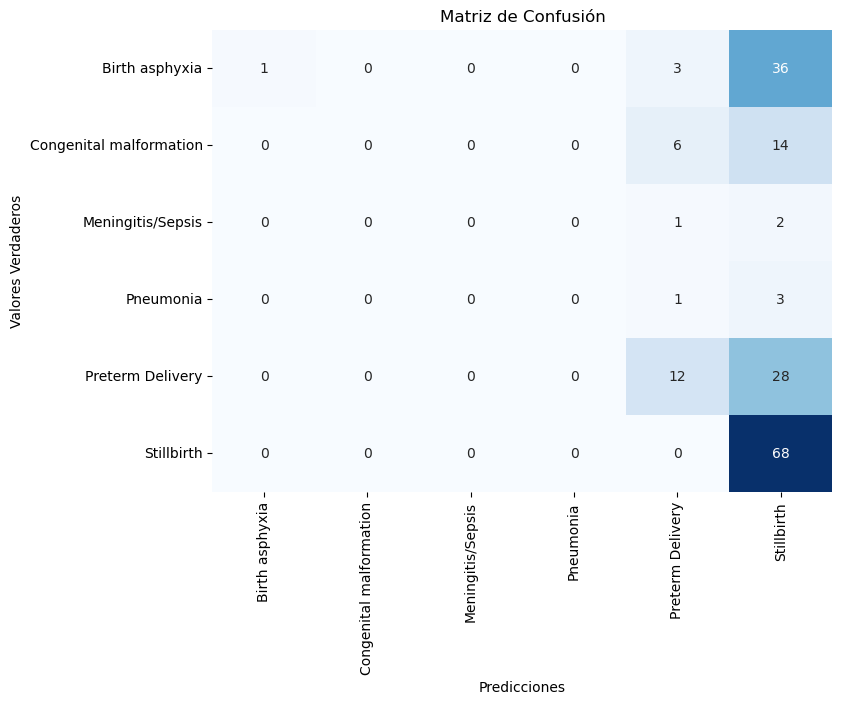

  (0, 2232)	0.3536020948427111
  (0, 1615)	0.2973668506389284
  (0, 802)	0.23485513423071527
  (0, 2052)	0.18172643416154316
  (0, 464)	0.8237465142072086
  (0, 3042)	0.14070808096128476
  (1, 885)	0.02261527770638227
  (1, 604)	0.06631221473483297
  (1, 1602)	0.048391385341389585
  (1, 73)	0.04181941619647718
  (1, 892)	0.04310068672038548
  (1, 411)	0.03515714245095895
  (1, 1993)	0.05160417790199814
  (1, 2069)	0.028235470255623427
  (1, 793)	0.07335831569517104
  (1, 3370)	0.047864205471778845
  (1, 2053)	0.05813216934728398
  (1, 2265)	0.0931518826302251
  (1, 2115)	0.04322329073513627
  (1, 1567)	0.05675173213090185
  (1, 1320)	0.07292689949406919
  (1, 1422)	0.0321481469660731
  (1, 1302)	0.04215721742731056
  (1, 2836)	0.04273928104424549
  (1, 249)	0.029136724151277948
  :	:
  (944, 2303)	0.06677845667775716
  (944, 548)	0.40545879603130663
  (944, 3289)	0.07540063551045811
  (944, 2019)	0.04861404781316041
  (944, 2123)	0.08976372795760833
  (944, 2865)	0.07990497320503367
  

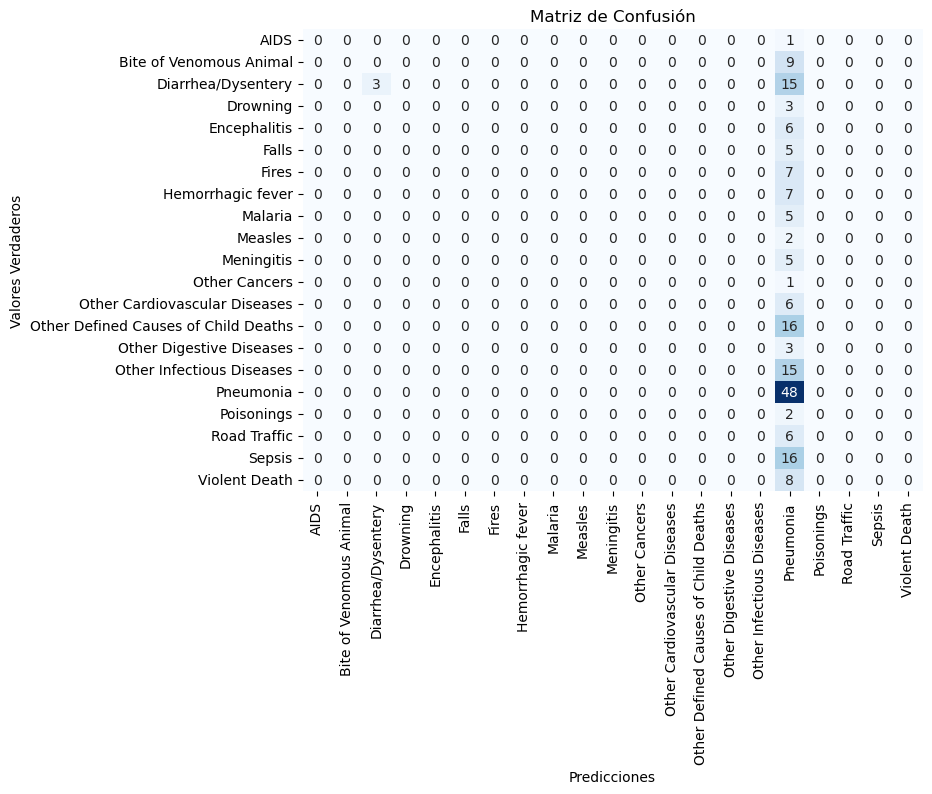

  (0, 1843)	0.08430983587336274
  (0, 2770)	0.22162145976095493
  (0, 2050)	0.05746477034777676
  (0, 2402)	0.17380314031111505
  (0, 6801)	0.12995635699908217
  (0, 839)	0.07722238734228846
  (0, 3372)	0.06515162278826564
  (0, 7713)	0.11105761732000531
  (0, 6670)	0.11434209931380591
  (0, 6626)	0.09963799266648647
  (0, 3660)	0.18351000619612334
  (0, 4968)	0.11244086130272009
  (0, 5272)	0.13980092649891485
  (0, 3235)	0.09169198729103496
  (0, 7040)	0.050583092800363924
  (0, 6015)	0.07186553275170866
  (0, 929)	0.08844341780759361
  (0, 2066)	0.10129979968996866
  (0, 4829)	0.051835349757045054
  (0, 1497)	0.13108539348716203
  (0, 6784)	0.11105761732000531
  (0, 1015)	0.06278354588487747
  (0, 4727)	0.14005132317960942
  (0, 231)	0.1144574304468864
  (0, 425)	0.10722571817051946
  :	:
  (3387, 2955)	0.07727970361996214
  (3387, 6344)	0.20543968473141674
  (3387, 5462)	0.18303808766775798
  (3387, 4734)	0.1467457776386249
  (3387, 1843)	0.09687023053034952
  (3387, 2050)	0.066025

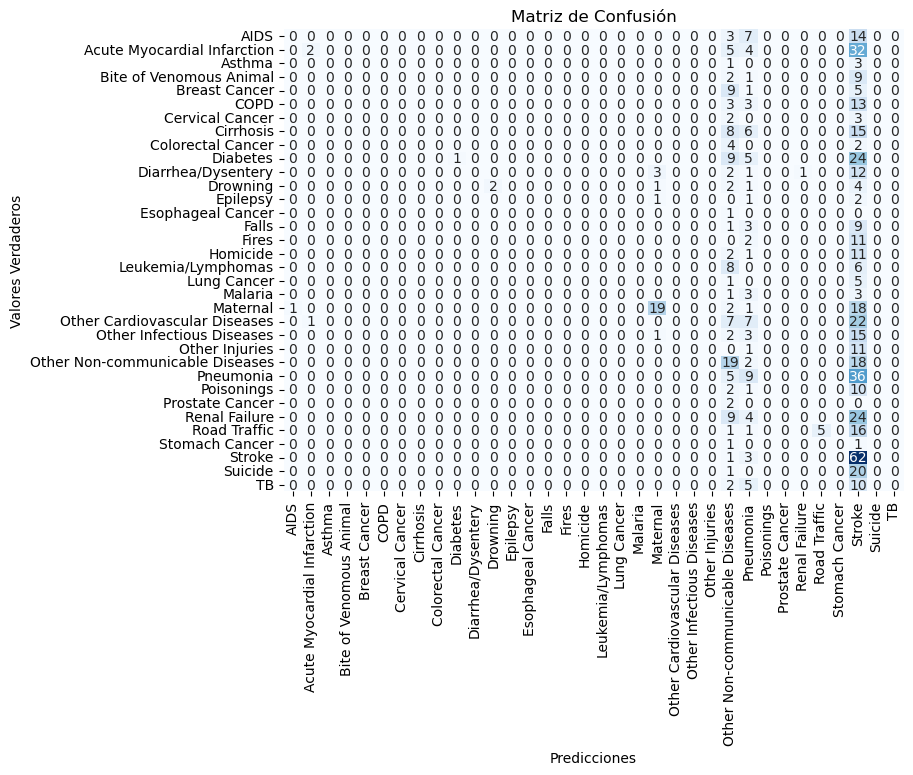

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

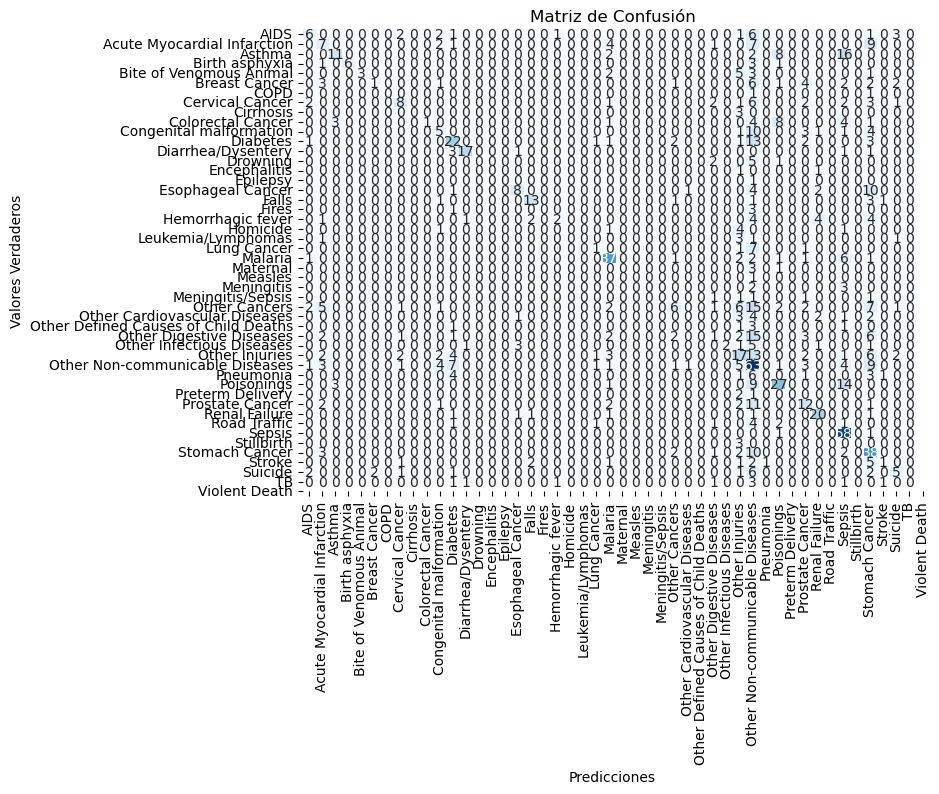

  (0, 2852)	0.030212858916784904
  (0, 514)	0.15113381567728956
  (0, 3042)	0.05709488481597293
  (0, 487)	0.058299336526212456
  (0, 2166)	0.06238368280255346
  (0, 1227)	0.11118975170975008
  (0, 1873)	0.08616402319401732
  (0, 497)	0.0597225235285204
  (0, 2154)	0.04870414403934839
  (0, 2878)	0.07087019601173815
  (0, 225)	0.04330212545652283
  (0, 410)	0.038939410712474025
  (0, 1772)	0.1190369603095867
  (0, 328)	0.04987745707495668
  (0, 1195)	0.05943019161328055
  (0, 741)	0.04378479311687836
  (0, 1896)	0.06542461933228107
  (0, 938)	0.15113381567728956
  (0, 1291)	0.0726819413207587
  (0, 2685)	0.06581262813230254
  (0, 2576)	0.0703796020815236
  (0, 1564)	0.12971104342096507
  (0, 1396)	0.07466189387221865
  (0, 469)	0.15113381567728956
  (0, 278)	0.05775561549326568
  :	:
  (874, 777)	0.11815404265769554
  (874, 2866)	0.15388512290266276
  (874, 3165)	0.18509303232833813
  (874, 2155)	0.06901014518191204
  (874, 1804)	0.05780944785291215
  (874, 2852)	0.07236819961677717
  

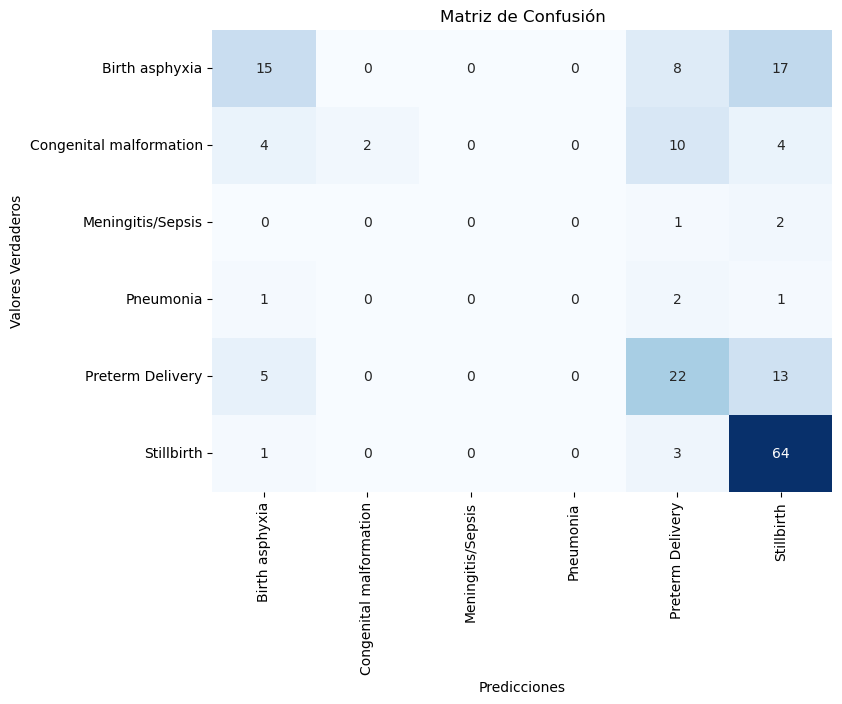

  (0, 2232)	0.3536020948427111
  (0, 1615)	0.2973668506389284
  (0, 802)	0.23485513423071527
  (0, 2052)	0.18172643416154316
  (0, 464)	0.8237465142072086
  (0, 3042)	0.14070808096128476
  (1, 885)	0.02261527770638227
  (1, 604)	0.06631221473483297
  (1, 1602)	0.048391385341389585
  (1, 73)	0.04181941619647718
  (1, 892)	0.04310068672038548
  (1, 411)	0.03515714245095895
  (1, 1993)	0.05160417790199814
  (1, 2069)	0.028235470255623427
  (1, 793)	0.07335831569517104
  (1, 3370)	0.047864205471778845
  (1, 2053)	0.05813216934728398
  (1, 2265)	0.0931518826302251
  (1, 2115)	0.04322329073513627
  (1, 1567)	0.05675173213090185
  (1, 1320)	0.07292689949406919
  (1, 1422)	0.0321481469660731
  (1, 1302)	0.04215721742731056
  (1, 2836)	0.04273928104424549
  (1, 249)	0.029136724151277948
  :	:
  (944, 2303)	0.06677845667775716
  (944, 548)	0.40545879603130663
  (944, 3289)	0.07540063551045811
  (944, 2019)	0.04861404781316041
  (944, 2123)	0.08976372795760833
  (944, 2865)	0.07990497320503367
  

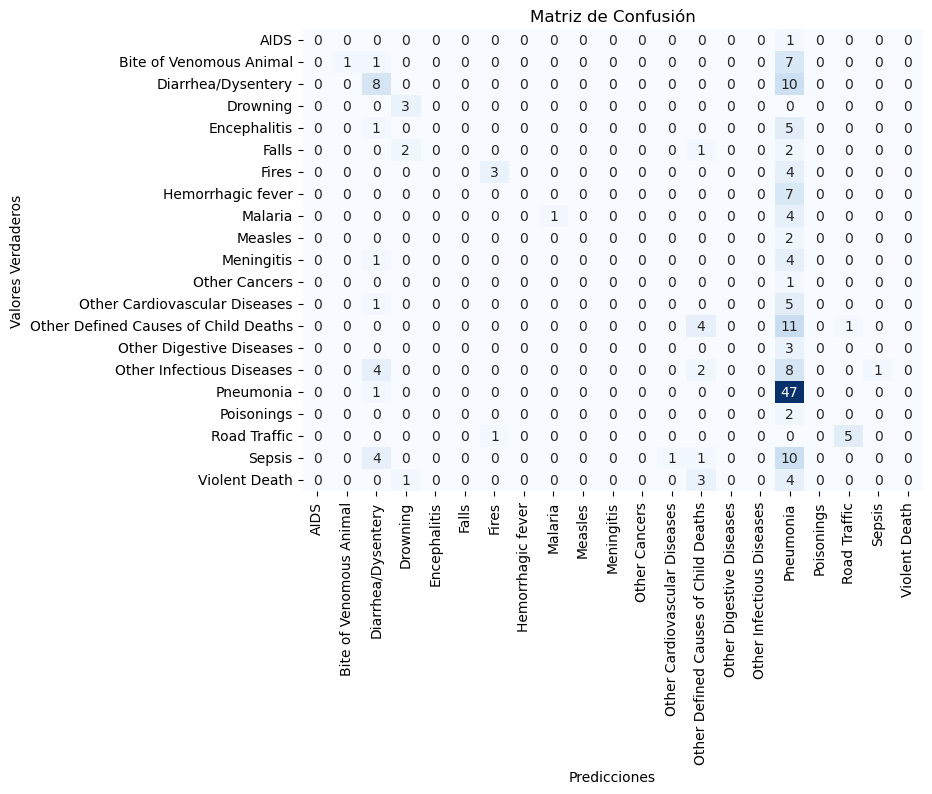

  (0, 1843)	0.08430983587336274
  (0, 2770)	0.22162145976095493
  (0, 2050)	0.05746477034777676
  (0, 2402)	0.17380314031111505
  (0, 6801)	0.12995635699908217
  (0, 839)	0.07722238734228846
  (0, 3372)	0.06515162278826564
  (0, 7713)	0.11105761732000531
  (0, 6670)	0.11434209931380591
  (0, 6626)	0.09963799266648647
  (0, 3660)	0.18351000619612334
  (0, 4968)	0.11244086130272009
  (0, 5272)	0.13980092649891485
  (0, 3235)	0.09169198729103496
  (0, 7040)	0.050583092800363924
  (0, 6015)	0.07186553275170866
  (0, 929)	0.08844341780759361
  (0, 2066)	0.10129979968996866
  (0, 4829)	0.051835349757045054
  (0, 1497)	0.13108539348716203
  (0, 6784)	0.11105761732000531
  (0, 1015)	0.06278354588487747
  (0, 4727)	0.14005132317960942
  (0, 231)	0.1144574304468864
  (0, 425)	0.10722571817051946
  :	:
  (3387, 2955)	0.07727970361996214
  (3387, 6344)	0.20543968473141674
  (3387, 5462)	0.18303808766775798
  (3387, 4734)	0.1467457776386249
  (3387, 1843)	0.09687023053034952
  (3387, 2050)	0.066025

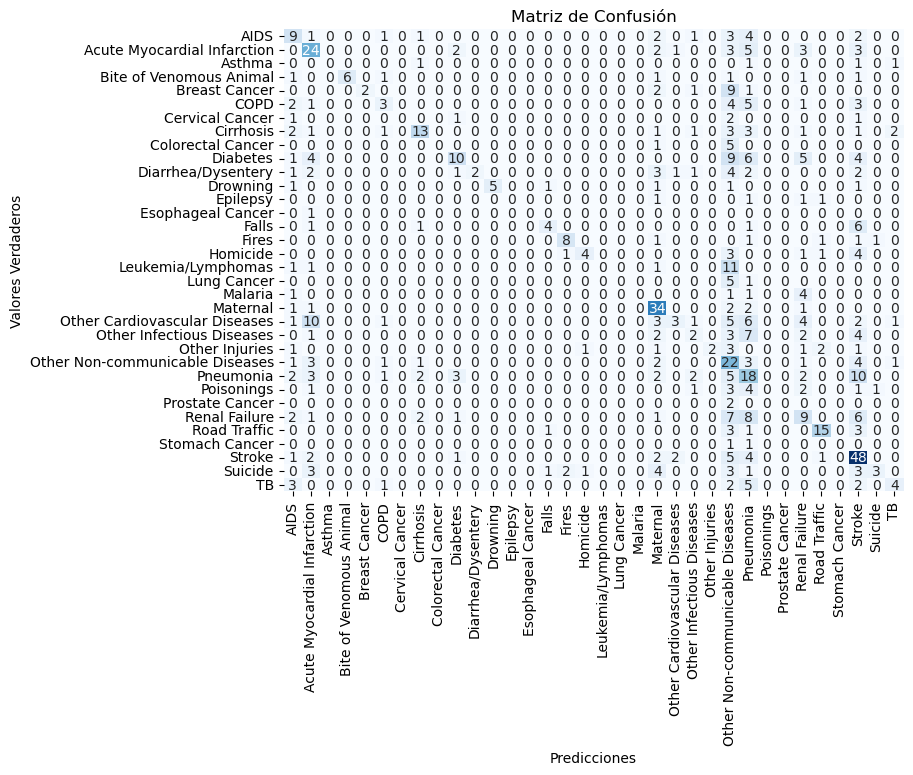

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

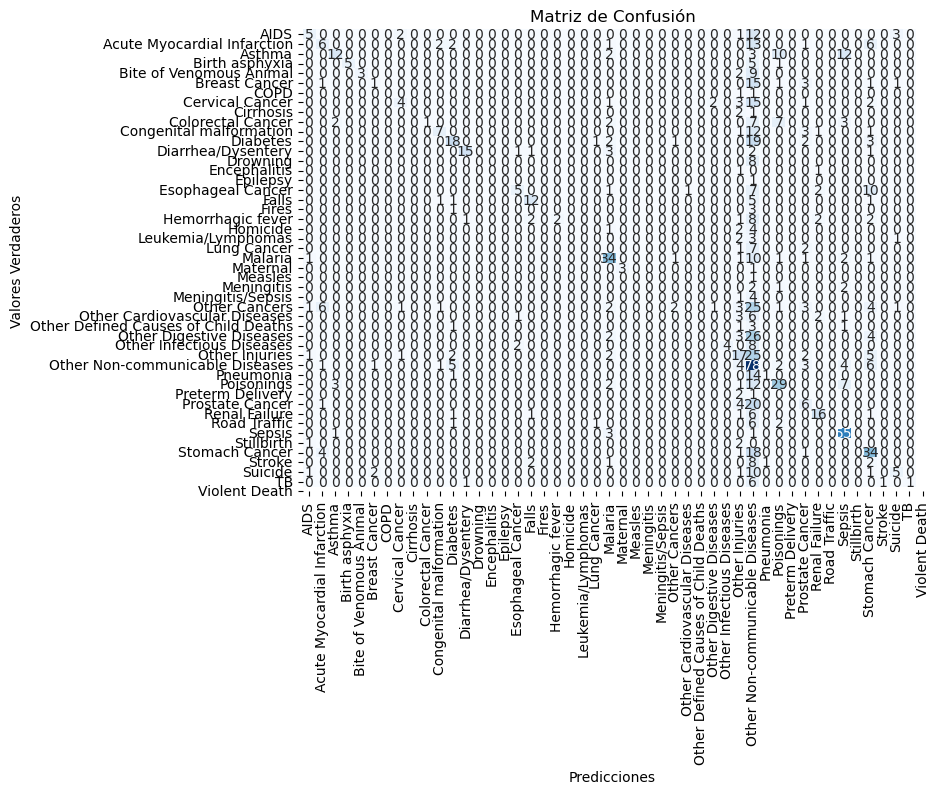

  (0, 2852)	0.030212858916784904
  (0, 514)	0.15113381567728956
  (0, 3042)	0.05709488481597293
  (0, 487)	0.058299336526212456
  (0, 2166)	0.06238368280255346
  (0, 1227)	0.11118975170975008
  (0, 1873)	0.08616402319401732
  (0, 497)	0.0597225235285204
  (0, 2154)	0.04870414403934839
  (0, 2878)	0.07087019601173815
  (0, 225)	0.04330212545652283
  (0, 410)	0.038939410712474025
  (0, 1772)	0.1190369603095867
  (0, 328)	0.04987745707495668
  (0, 1195)	0.05943019161328055
  (0, 741)	0.04378479311687836
  (0, 1896)	0.06542461933228107
  (0, 938)	0.15113381567728956
  (0, 1291)	0.0726819413207587
  (0, 2685)	0.06581262813230254
  (0, 2576)	0.0703796020815236
  (0, 1564)	0.12971104342096507
  (0, 1396)	0.07466189387221865
  (0, 469)	0.15113381567728956
  (0, 278)	0.05775561549326568
  :	:
  (874, 777)	0.11815404265769554
  (874, 2866)	0.15388512290266276
  (874, 3165)	0.18509303232833813
  (874, 2155)	0.06901014518191204
  (874, 1804)	0.05780944785291215
  (874, 2852)	0.07236819961677717
  

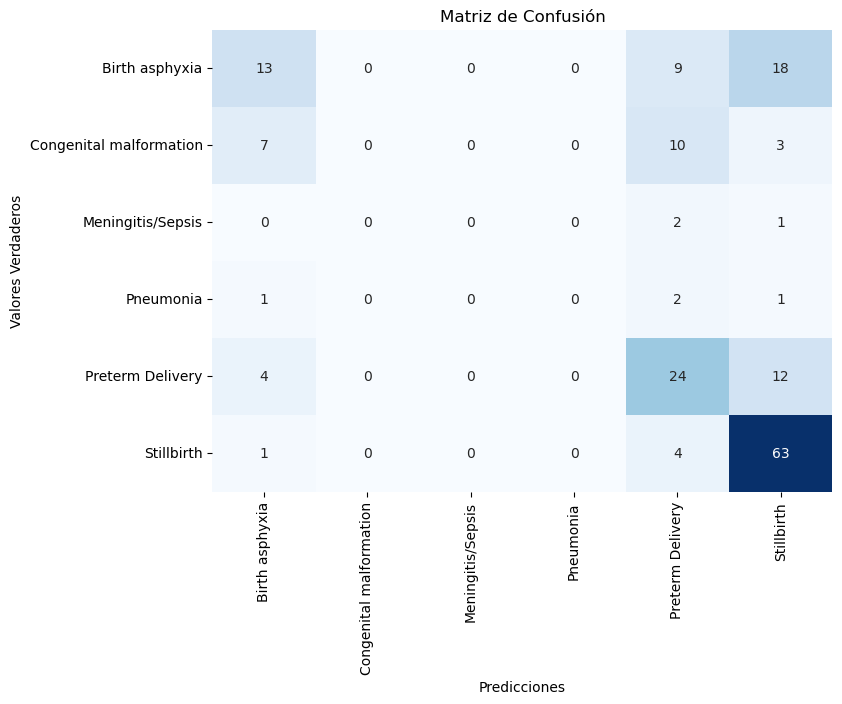

  (0, 2232)	0.3536020948427111
  (0, 1615)	0.2973668506389284
  (0, 802)	0.23485513423071527
  (0, 2052)	0.18172643416154316
  (0, 464)	0.8237465142072086
  (0, 3042)	0.14070808096128476
  (1, 885)	0.02261527770638227
  (1, 604)	0.06631221473483297
  (1, 1602)	0.048391385341389585
  (1, 73)	0.04181941619647718
  (1, 892)	0.04310068672038548
  (1, 411)	0.03515714245095895
  (1, 1993)	0.05160417790199814
  (1, 2069)	0.028235470255623427
  (1, 793)	0.07335831569517104
  (1, 3370)	0.047864205471778845
  (1, 2053)	0.05813216934728398
  (1, 2265)	0.0931518826302251
  (1, 2115)	0.04322329073513627
  (1, 1567)	0.05675173213090185
  (1, 1320)	0.07292689949406919
  (1, 1422)	0.0321481469660731
  (1, 1302)	0.04215721742731056
  (1, 2836)	0.04273928104424549
  (1, 249)	0.029136724151277948
  :	:
  (944, 2303)	0.06677845667775716
  (944, 548)	0.40545879603130663
  (944, 3289)	0.07540063551045811
  (944, 2019)	0.04861404781316041
  (944, 2123)	0.08976372795760833
  (944, 2865)	0.07990497320503367
  

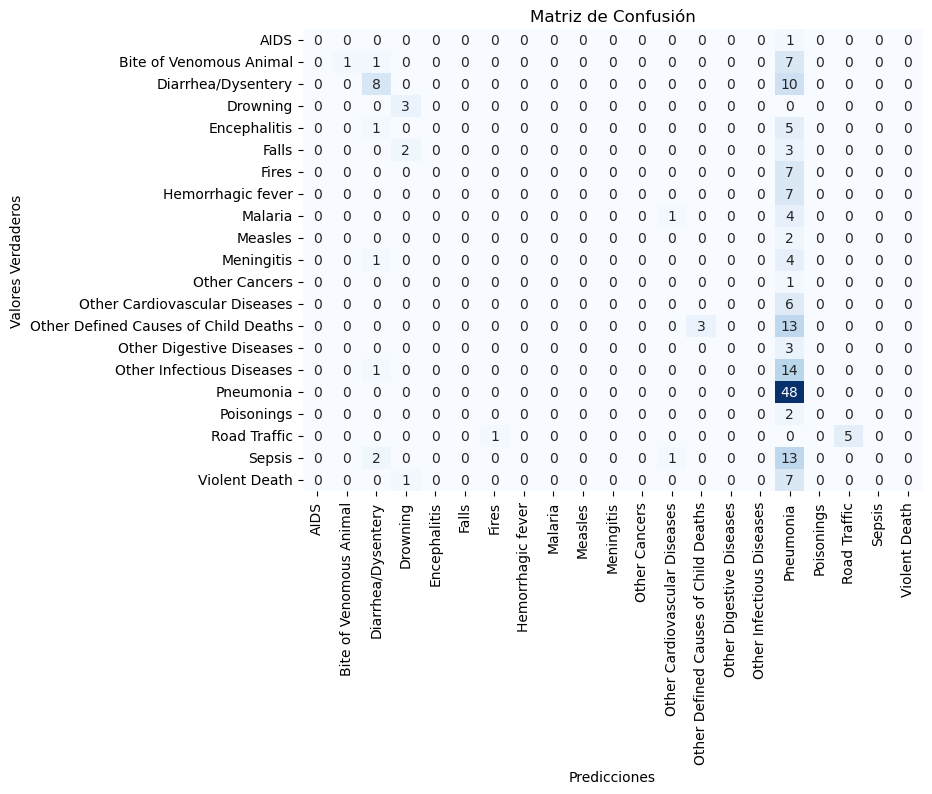

  (0, 1843)	0.08430983587336274
  (0, 2770)	0.22162145976095493
  (0, 2050)	0.05746477034777676
  (0, 2402)	0.17380314031111505
  (0, 6801)	0.12995635699908217
  (0, 839)	0.07722238734228846
  (0, 3372)	0.06515162278826564
  (0, 7713)	0.11105761732000531
  (0, 6670)	0.11434209931380591
  (0, 6626)	0.09963799266648647
  (0, 3660)	0.18351000619612334
  (0, 4968)	0.11244086130272009
  (0, 5272)	0.13980092649891485
  (0, 3235)	0.09169198729103496
  (0, 7040)	0.050583092800363924
  (0, 6015)	0.07186553275170866
  (0, 929)	0.08844341780759361
  (0, 2066)	0.10129979968996866
  (0, 4829)	0.051835349757045054
  (0, 1497)	0.13108539348716203
  (0, 6784)	0.11105761732000531
  (0, 1015)	0.06278354588487747
  (0, 4727)	0.14005132317960942
  (0, 231)	0.1144574304468864
  (0, 425)	0.10722571817051946
  :	:
  (3387, 2955)	0.07727970361996214
  (3387, 6344)	0.20543968473141674
  (3387, 5462)	0.18303808766775798
  (3387, 4734)	0.1467457776386249
  (3387, 1843)	0.09687023053034952
  (3387, 2050)	0.066025

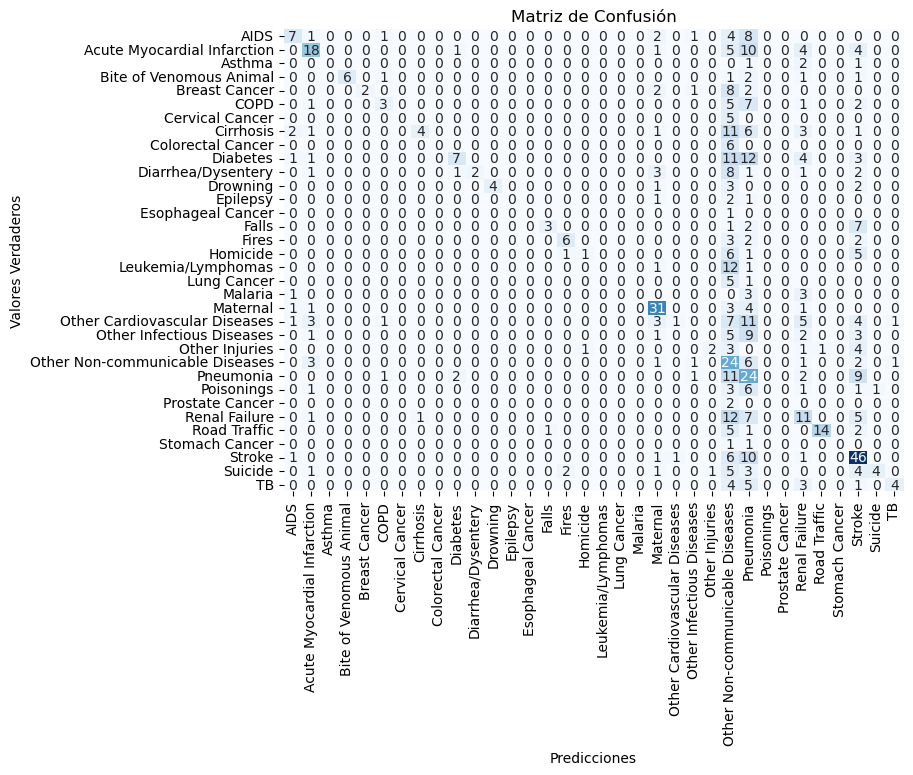

In [30]:
models=["nb","lr","svm"]
f_scores = []
# Iterar sobre los modelos
for model_type in models:
    # Obtener el modelo correspondiente
    if model_type == "nb":
        model = MultinomialNB()
    elif model_type == "lr":
        model = LogisticRegression(max_iter=500)
    elif model_type == "svm":
        model = SVC()

# Almacenar F-scores para cada intervalo de edad
    
    f_scores_interval = []
  # Entrenar y evaluar el modelo con el conjunto de datos específico
    f_score = train_and_evaluate_model(model, x_train, y_train)
    f_scores_interval.append(f_score)

    f_score = train_and_evaluate_model(model, x_train_neonate, y_train_neonate)
    f_scores_interval.append(f_score)
    
    f_score = train_and_evaluate_model(model, x_train_child, y_train_child)
    f_scores_interval.append(f_score)
    
    f_score = train_and_evaluate_model(model, x_train_adult, y_train_adult)
    f_scores_interval.append(f_score)
    f_scores.append((model_type, f_scores_interval))

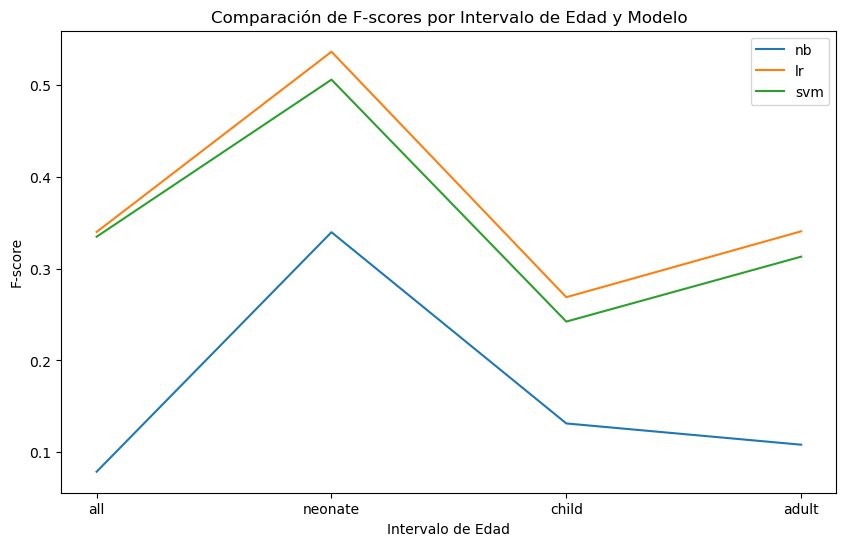

In [21]:
plt.figure(figsize=(10, 6))

intervalos_edad = ['all','neonate', 'child', 'adult']

for model_type, f_scores_interval in f_scores:
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Graficar los resultados para cada intervalo de edad
    plt.plot(intervalos_edad, f_scores_interval, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.legend()
plt.show()

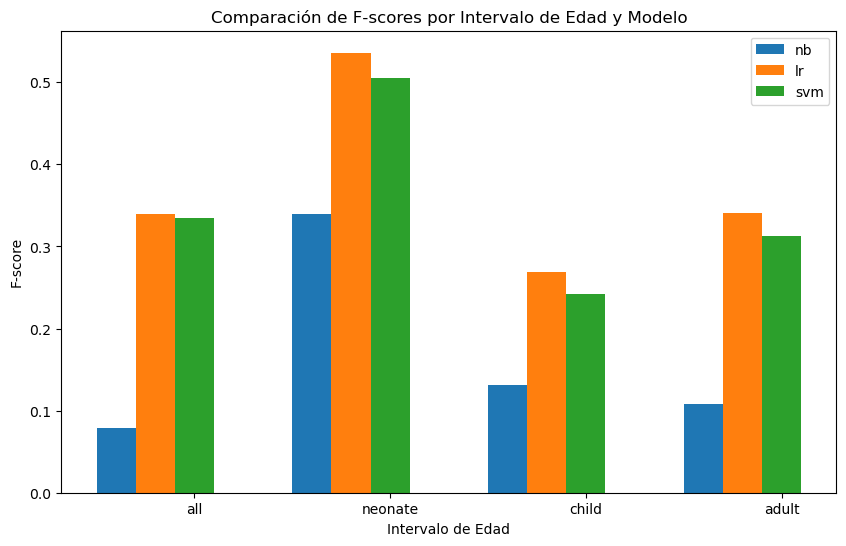

In [23]:
plt.figure(figsize=(10, 6))
intervalos_edad = ['all', 'neonate', 'child', 'adult']

for i, (model_type, f_scores_interval) in enumerate(f_scores):
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Calcular la posición de las barras para cada modelo
    bar_positions = [x + i * 0.2 for x in range(len(intervalos_edad))]

    # Graficar las barras para cada modelo
    plt.bar(bar_positions, f_scores_interval, width=0.2, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.xticks([x + 0.4 for x in range(len(intervalos_edad))], intervalos_edad)  # Ajustar las posiciones de las etiquetas
plt.legend()
plt.show()

In [1]:
def frec_muertes(train):

    enfermedades_counts = train['gs_text34'].value_counts()
    # Graficar el recuento de enfermedades
    plt.figure(figsize=(12, 6))
    enfermedades_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Enfermedades')
    plt.ylabel('Frecuencia')
    plt.title('Recuento de Enfermedades en el Conjunto de Datos')
    plt.xticks(rotation=45, ha='right')
    plt.show()

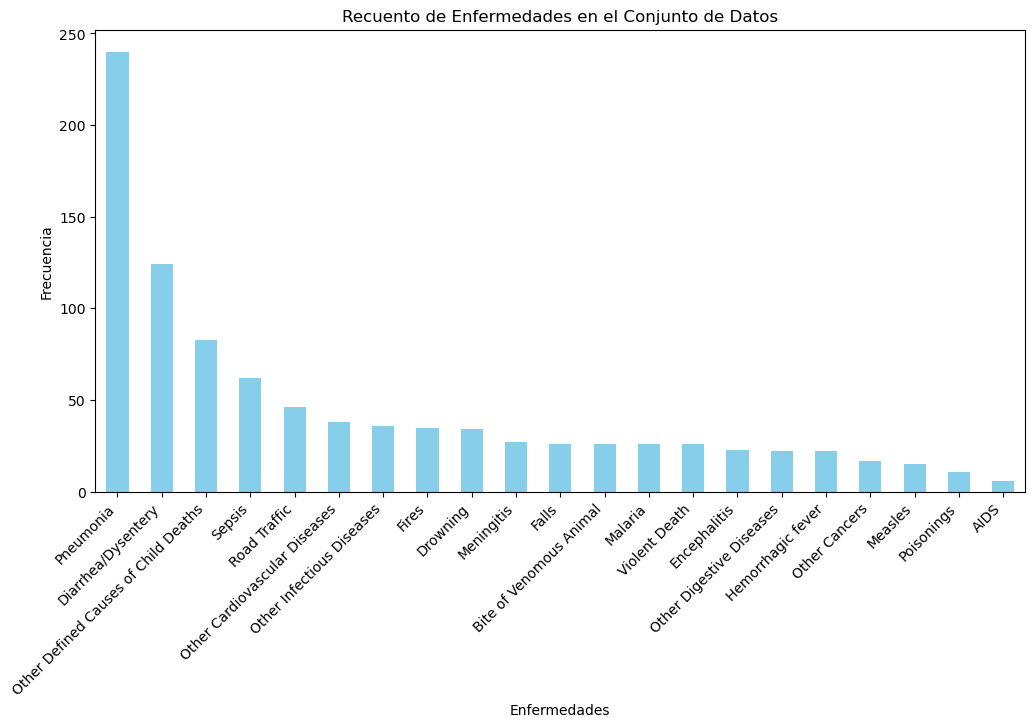

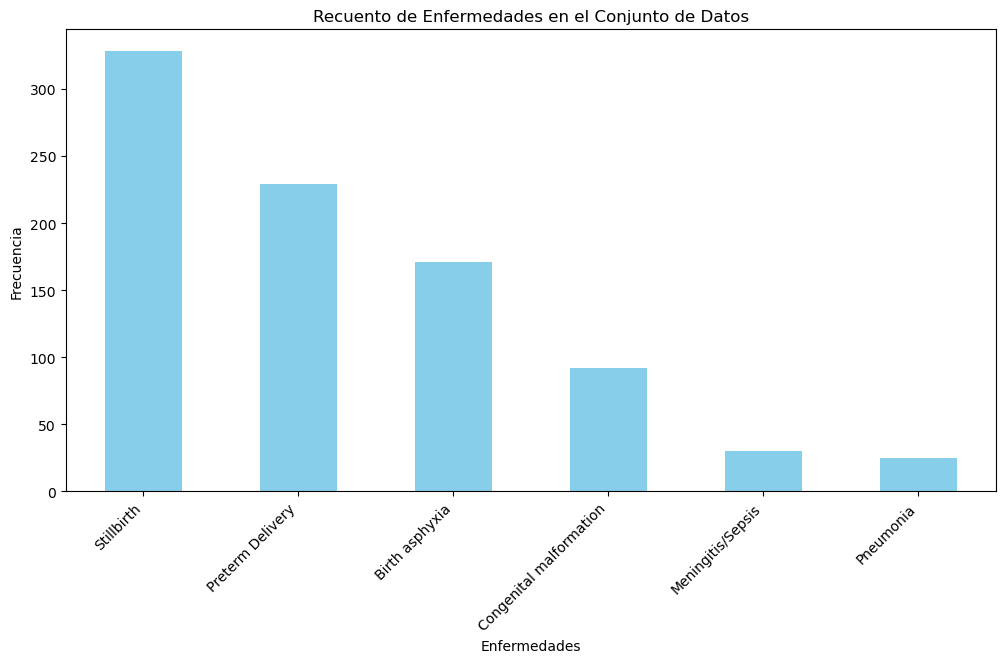

In [8]:
frec_muertes(train_child)
frec_muertes(train_neonate)

In [15]:
def mapeo(train):
    mapeo = {
    'Diarrhea/Dysentery': 'Certain infectious and Parasitic Diseases',
    'Other infectious diseases': 'Certain infectious and Parasitic Diseases',
    'AIDS': 'Certain infectious and Parasitic Diseases',
    'Sepsis': 'Certain infectious and Parasitic Diseases',
    'Meningitis': 'Certain infectious and Parasitic Diseases',
    'Meningitis/Sepsis': 'Certain infectious and Parasitic Diseases',
    'Malaria': 'Certain infectious and Parasitic Diseases',
    'Encephalitis': 'Certain infectious and Parasitic Diseases',
    'Measles': 'Certain infectious and Parasitic Diseases',
    'Hemorrhagic Fever': 'Certain infectious and Parasitic Diseases',
    'TB': 'Certain infectious and Parasitic Diseases',
    'Leukemia/Lymphomas': 'Neoplasms',
    'Colorectal Cancer': 'Neoplasms',
    'Lung Cancer': 'Neoplasms',
    'Cervical Cancer': 'Neoplasms',
    'Breast Cancer': 'Neoplasms',
    'Stomach Cancer': 'Neoplasms',
    'Prostate Cancer': 'Neoplasms',
    'Esophageal Cancer': 'Neoplasms',
    'Other Cancers': 'Neoplasms',
    'Diabetes': 'Endocrine, Nutritional and Metabolic Diseases',
    'Epilepsy': 'Diseases of the Nervous System',
    'Stroke': 'Diseases of the circulatory system',
    'Acute Myocardial Infarction': 'Diseases of the circulatory system',
    'Pneumonia': 'Diseases of Respiratory System',
    'Asthma': 'Diseases of Respiratory System',
    'COPD': 'Diseases of Respiratory System',
    'Cirrhosis': 'Diseases of the Digestive System',
    'Other Digestive Diseases': 'Diseases of the Digestive System',
    'Renal Failure': 'Diseases of the Genitourinary System',
    'Preterm Delivery': 'Pregnancy, childbirth and the puerperium',
    'Stillbirth': 'Pregnancy, childbirth and the puerperium',
    'Maternal': 'Pregnancy, childbirth and the puerperium',
    'Birth Asphyxia': 'Pregnancy, childbirth and the puerperium',
    'Congenital Malformations': 'Congenital Malformations',
    'Bite of Venomous Animal': 'Injury, Poisoning and External Causes',
    'Poisonings': 'Injury, Poisoning and External Causes',
    'Road Traffic': 'External Causes of Morbidity and Mortality',
    'Falls': 'External Causes of Morbidity and Mortality',
    'Homicide': 'External Causes of Morbidity and Mortality',
    'Fires': 'External Causes of Morbidity and Mortality',
    'Drowning': 'External Causes of Morbidity and Mortality',
    'Suicide': 'External Causes of Morbidity and Mortality',
    'Violent Death': 'External Causes of Morbidity and Mortality',
    'Other injuries': 'External Causes of Morbidity and Mortality'
}
    trainM=train
# Aplicar el mapeo a la columna 'gs_text34'
    trainM['gs_text34'] = trainM['gs_text34'].replace(mapeo)
    return (trainM)

In [17]:
train_neonateM=mapeo(train_neonate)
train_childM=mapeo(train_child)
train_adultM=mapeo(train_adult)
trainM=mapeo(train)

x_trainM=trainM['open_response']
y_trainM=trainM['gs_text34']

x_train_childM = train_childM['open_response']
y_train_childM= train_childM['gs_text34']

x_train_neonateM = train_neonateM['open_response']
y_train_neonateM= train_neonateM['gs_text34']

x_train_adultM = train_adultM['open_response']
y_train_adultM= train_adultM['gs_text34']


/tmp/ipykernel_121705/1068135019.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainM['gs_text34'] = trainM['gs_text34'].replace(mapeo)


In [18]:
models=["nb","lr","svm"]
f_scores = []
# Iterar sobre los modelos
for model_type in models:
    # Obtener el modelo correspondiente
    if model_type == "nb":
        model = MultinomialNB()
    elif model_type == "lr":
        model = LogisticRegression(max_iter=500)
    elif model_type == "svm":
        model = SVC()

# Almacenar F-scores para cada intervalo de edad
    
    f_scores_interval = []
  # Entrenar y evaluar el modelo con el conjunto de datos específico
    f_score = train_and_evaluate_model(model, x_trainM, y_trainM)
    f_scores_interval.append(f_score)

    f_score = train_and_evaluate_model(model, x_train_neonateM, y_train_neonateM)
    f_scores_interval.append(f_score)
    
    f_score = train_and_evaluate_model(model, x_train_childM, y_train_childM)
    f_scores_interval.append(f_score)
    
    f_score = train_and_evaluate_model(model, x_train_adultM, y_train_adultM)
    f_scores_interval.append(f_score)
    f_scores.append((model_type, f_scores_interval))

  (0, 2178)	0.08288511483341755
  (0, 3275)	0.22985935461160248
  (0, 2425)	0.056256004527569584
  (0, 2841)	0.17185882950298373
  (0, 8002)	0.1389095521836163
  (0, 998)	0.07958393619659926
  (0, 3983)	0.06870171363975346
  (0, 9067)	0.10858158092949684
  (0, 7841)	0.10939260401718347
  (0, 7795)	0.09536603386391576
  (0, 4322)	0.1884170973687337
  (0, 5840)	0.1065139826001582
  (0, 6203)	0.1288275377524736
  (0, 3826)	0.0923305814064941
  (0, 8278)	0.048871284850021464
  (0, 7096)	0.07087383620262665
  (0, 1105)	0.08410700504964269
  (0, 2442)	0.09862075877953928
  (0, 5677)	0.05029446624822061
  (0, 1761)	0.13659195812213948
  (0, 7982)	0.11232921629019701
  (0, 1209)	0.06126988624013977
  (0, 5566)	0.12664623386711857
  (0, 273)	0.11378687292356625
  (0, 502)	0.10589424733459592
  :	:
  (5207, 7476)	0.20839499409123868
  (5207, 6464)	0.17339413055144054
  (5207, 5573)	0.13784627416479622
  (5207, 2198)	0.16509778312647666
  (5207, 2178)	0.09284295141951121
  (5207, 2425)	0.06301461

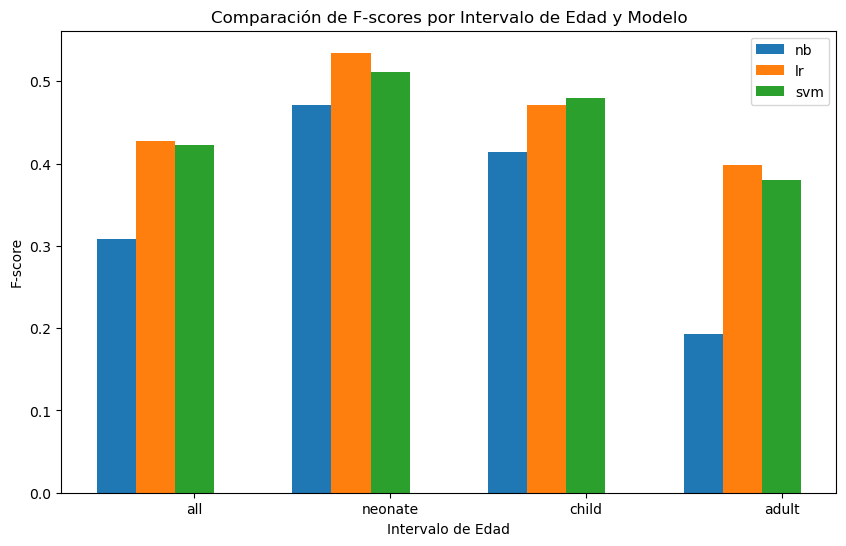

In [19]:
plt.figure(figsize=(10, 6))
intervalos_edad = ['all', 'neonate', 'child', 'adult']

for i, (model_type, f_scores_interval) in enumerate(f_scores):
    # Asegurarse de que las listas tengan la misma longitud
    f_scores_interval = f_scores_interval[:5]  # Tomar solo los primeros cinco elementos
    
    # Calcular la posición de las barras para cada modelo
    bar_positions = [x + i * 0.2 for x in range(len(intervalos_edad))]

    # Graficar las barras para cada modelo
    plt.bar(bar_positions, f_scores_interval, width=0.2, label=model_type)

plt.xlabel('Intervalo de Edad')
plt.ylabel('F-score')
plt.title('Comparación de F-scores por Intervalo de Edad y Modelo')
plt.xticks([x + 0.4 for x in range(len(intervalos_edad))], intervalos_edad)  # Ajustar las posiciones de las etiquetas
plt.legend()
plt.show()

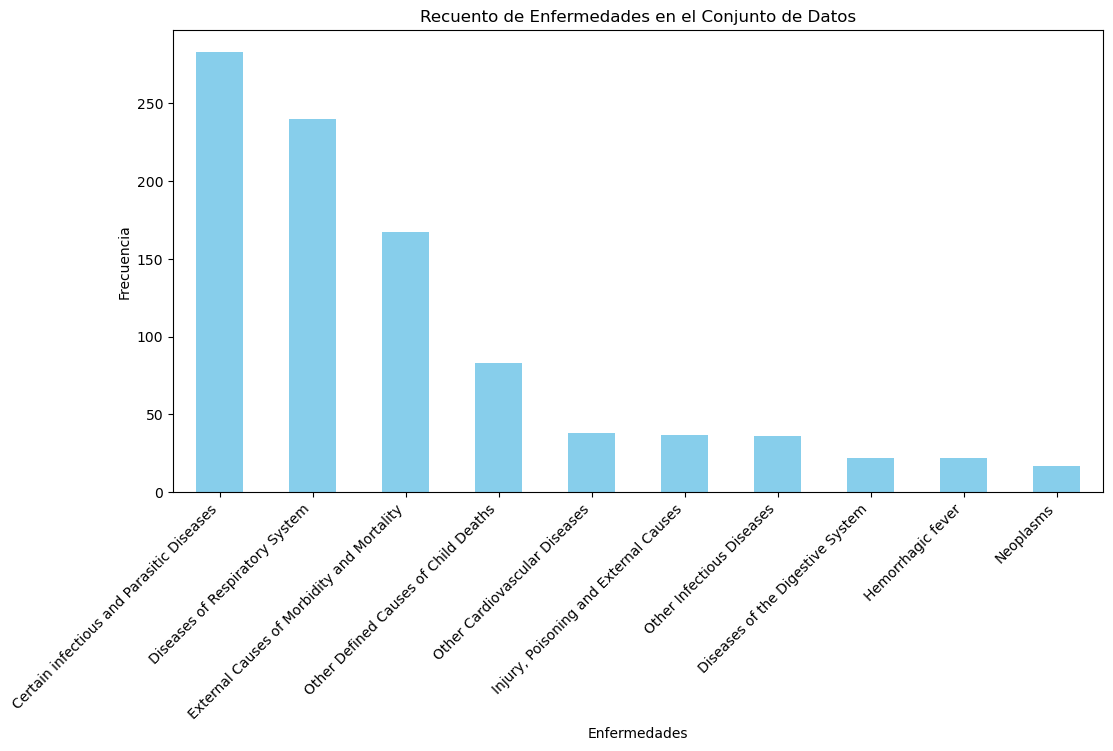

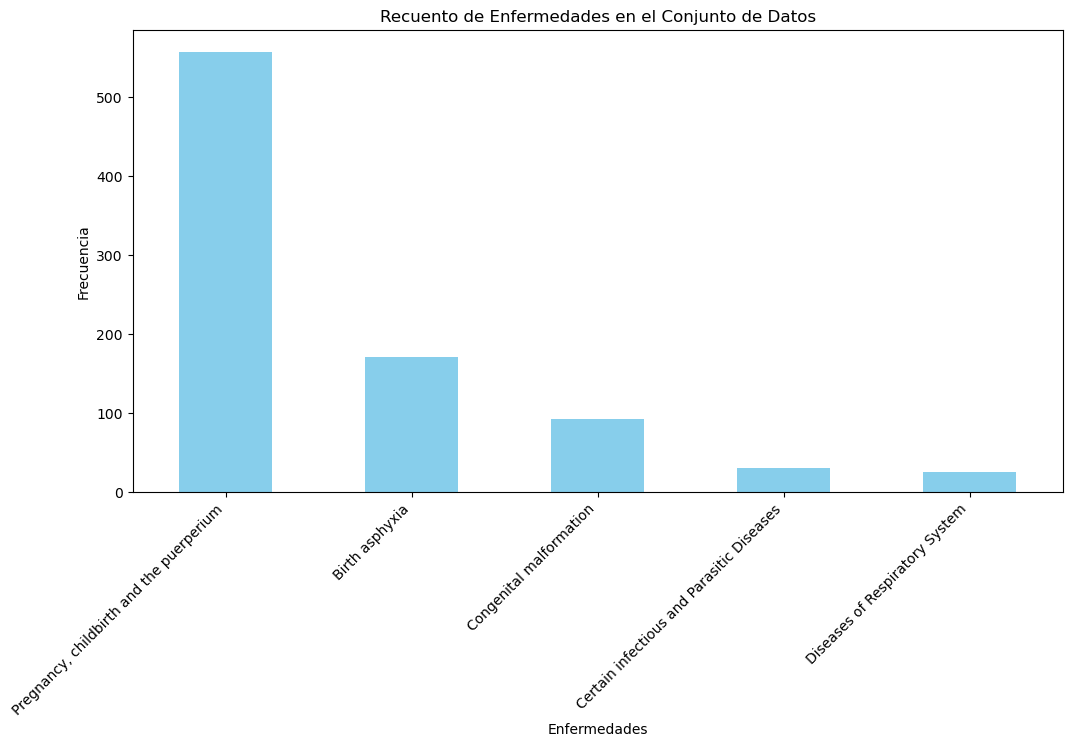

In [20]:
frec_muertes(train_childM)
frec_muertes(train_neonateM)

In [ ]:
# Función para entrenar y evaluar un modelo
def train_and_evaluate_model(model, x_train, y_train):
    vectorizer = TfidfVectorizer()
    x_train_vec = vectorizer.fit_transform(x_train)
    print(x_train_vec)
    #vectorizer = CountVectorizer()
    #x_train_vec = vectorizer.fit_transform(x_train)
    # Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(
        x_train_vec, y_train, test_size=0.2, random_state=42
    )
    
    # Entrenar el modelo
    model.fit(x_train_split, y_train_split)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(x_test_split)

    # Calcular el F-score
    f_score = f1_score(y_test_split, y_pred, average='weighted')
    return f_score

Añadir features adicionales al texto sin segmentación.